In [1]:
# Importing all libraries.
from pylab import *
from netCDF4 import Dataset
%matplotlib inline
import os
import cmocean as cm
from trackeddy.tracking import *
from trackeddy.datastruct import *
from trackeddy.geometryfunc import *
from trackeddy.init import *
from trackeddy.physics import *
from trackeddy.plotfunc import *

import matplotlib.pyplot as plt, mpld3

#import cosima_cookbook as cc

In [2]:
# Output data path
outputpath='/g/data3/hh5/tmp/akm157/mom01v5_kds75/output306/'
# Import SSH values to python environment.
ncfile=Dataset(outputpath+'rregionsouthern_ocean_daily_eta_t.nc')
eta=ncfile.variables['eta_t'][:]*100
# Import geographic coordinates (Lon,Lat)
lon=ncfile.variables['xt_ocean_sub01'][:]
lat=ncfile.variables['yt_ocean_sub01'][:]

In [3]:
# Import SSH 10 yrs mean values to python environment.
ncfile=Dataset('/home/156/jm5970/github/trackeddy/data.input/meanssh_10yrs_AEXP.nc')
ssh_mean=squeeze(ncfile.variables['SSH_mean'][:])
# Import geographic coordinates (Lon,Lat)
lon=ncfile.variables['Longitude'][:]
lat=ncfile.variables['Latitude'][:]

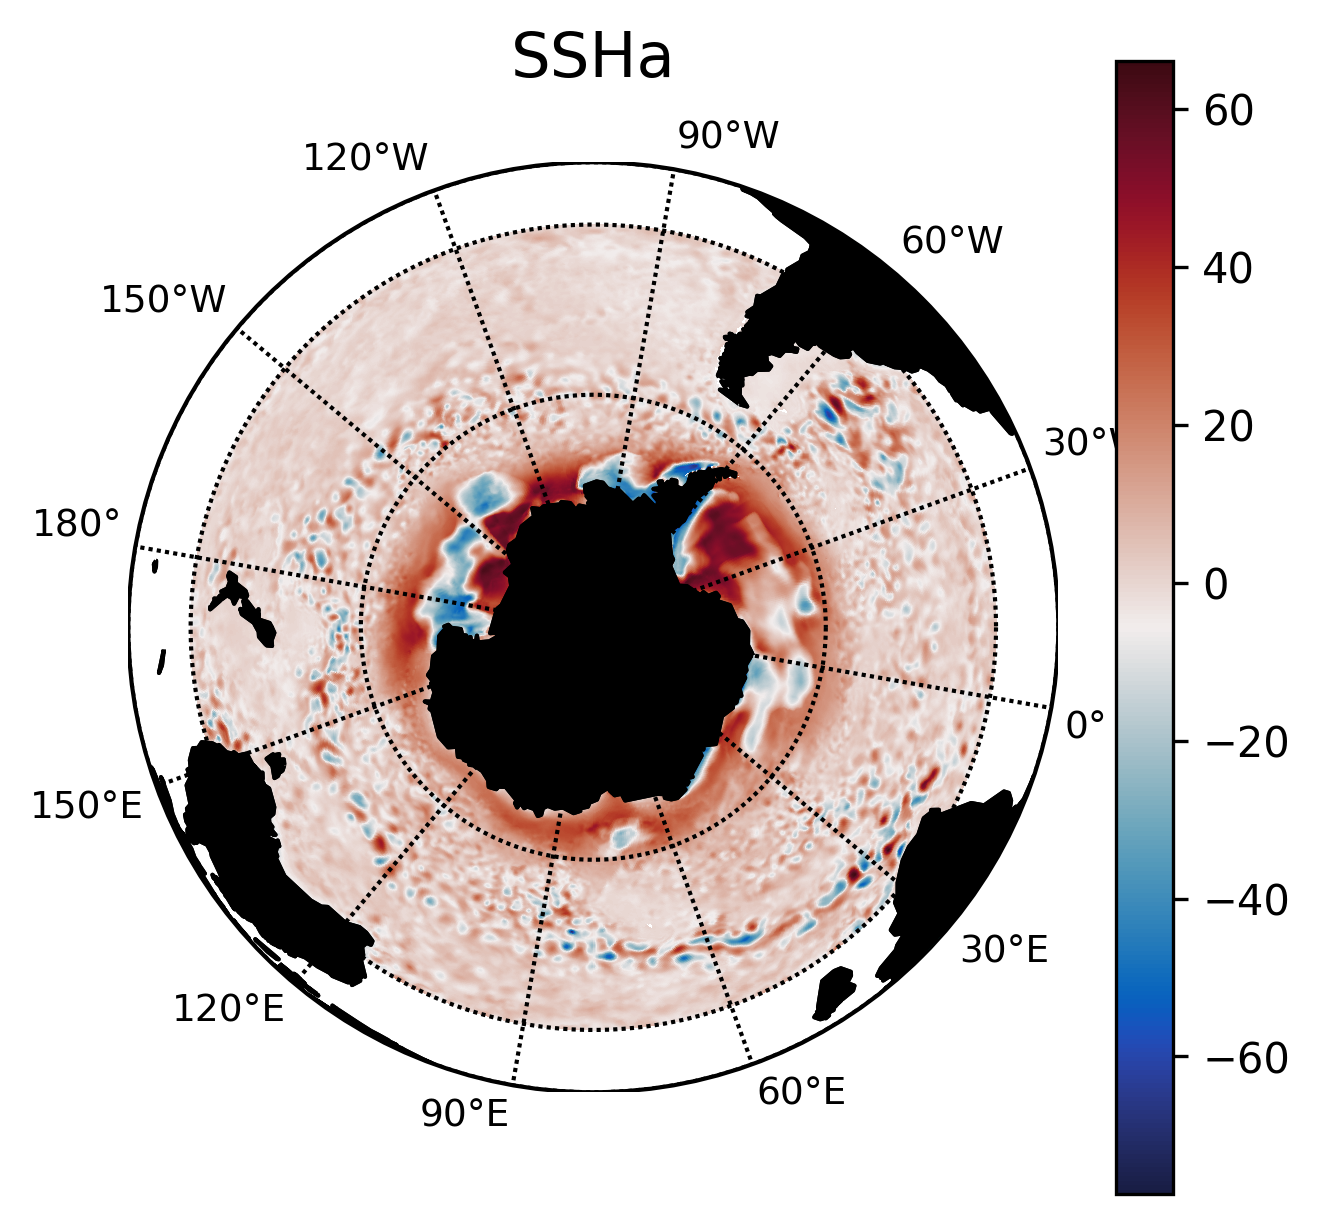

In [4]:
basemap_mplot(lon,lat,eta[0,:,:]-ssh_mean,title="SSHa",scale='Lin',cmap=cm.cm.balance\
              ,vmin='',vmax='',xan=1,yan=1,figsize=(5,5),fontsize=15)
colorbar()

In [5]:
###This mask is necessary to remask each time step, 
#It's not necesary if your mask is good in all the time steps
mask=ma.getmask(eta[0,:,:])

#Area in indexes, probably in the future it will be added an option for lon - lat coords.
#areamap=array([[3120,3180],[790,840]])
areamap=array([[3050,3150],[765,865]])

(array([], dtype=float64), <a list of 0 Text yticklabel objects>)

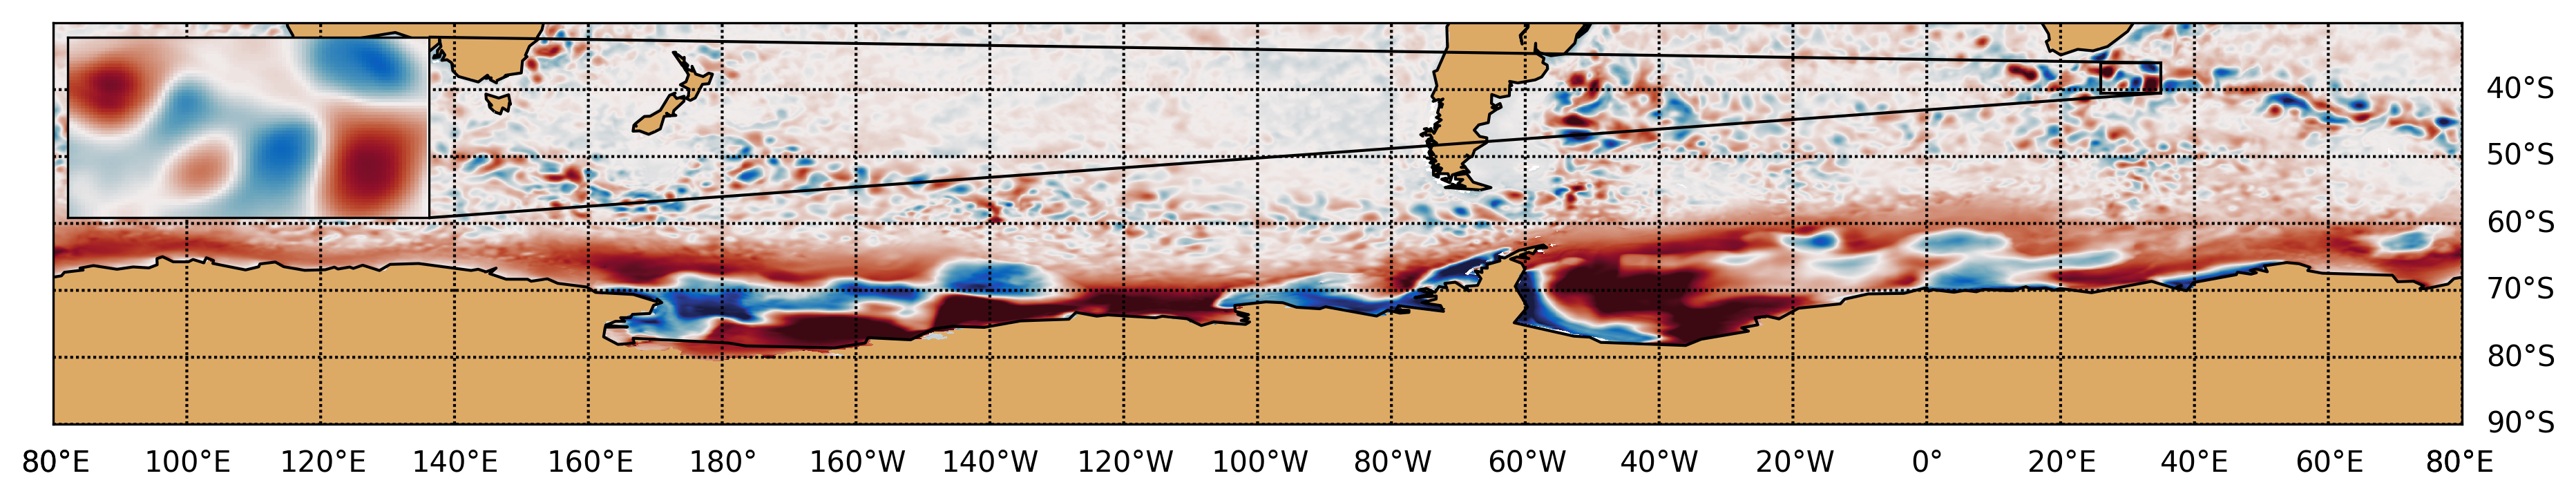

In [6]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset
import numpy as np

fig = plt.figure(figsize=[15,5],dpi=300)
ax = fig.add_subplot(111)

map = Basemap(projection='cyl', 
              lat_0=0, lon_0=-100)

map.fillcontinents(color='#ddaa66', lake_color='#7777ff', zorder=0)
map.drawcoastlines()

x, y = map(lon, lat)

map.pcolormesh(x, y,eta[0,:,:]-ssh_mean,cmap=cm.cm.balance,vmin=-50,vmax=50)
ax.set_ylim(-90, -30)

parallels = np.arange(-90.,-30.,10.)
# labels = [left,right,top,bottom]
map.drawparallels(parallels,labels=[False,True,True,False])
meridians = np.arange(0.,360.,20.)
map.drawmeridians(meridians,labels=[True,False,False,True])

axins = zoomed_inset_axes(ax, 6, loc=2)

axins.set_xlim(0, 40)
axins.set_ylim(-45, -30)

map2 = Basemap(llcrnrlon=26,llcrnrlat=-40.5,urcrnrlon=35,urcrnrlat=-36, ax=axins)
map2.fillcontinents()
map2.drawcoastlines()
map2.drawcountries()
map2.pcolormesh(x[areamap[0,0]:areamap[0,1]],y[areamap[1,0]:areamap[1,1]],\
                eta[0,areamap[1,0]:areamap[1,1],areamap[0,0]:areamap[0,1]]\
                -ssh_mean[areamap[1,0]:areamap[1,1],areamap[0,0]:areamap[0,1]],cmap=cm.cm.balance,vmin=-80,vmax=80)

mark_inset(ax, axins, loc1=1, loc2=4, fc="none", ec="0")

plt.xticks(visible=False)
plt.yticks(visible=False)


In [7]:
eddytd1=analyseddyzt(eta,lon,lat,0,1,1,10,10,10,data_meant=ssh_mean,areamap=areamap,mask='',\
                     eccenfit=1,ellipsrsquarefit=0,gaussrsquarefit=0,sfilter='uniform',\
                     destdir='',physics='',diagnostics=False,pprint=False)

 0% [>]100% Time Elapsed: 0 s  Number of contours analysed: 4 


In [8]:
eddytd2=analyseddyzt(eta,lon,lat,0,1,1,20,20,10,data_meant=ssh_mean,areamap=areamap,mask='',\
                     eccenfit=1,ellipsrsquarefit=0,gaussrsquarefit=0,sfilter='uniform',\
                     destdir='',physics='',diagnostics=False,pprint=False)

 0% [>]100% Time Elapsed: 0 s  Number of contours analysed: 3 


In [9]:
eddytd3=analyseddyzt(eta,lon,lat,0,1,1,30,30,10,data_meant=ssh_mean,areamap=areamap,mask=''\
                     ,destdir='',physics='',diagnostics=False,pprint=False,sfilter='uniform')

 0% [>]100% Time Elapsed: 0 s  Number of contours analysed: 3 


In [10]:
eddytd4=analyseddyzt(eta,lon,lat,0,1,1,40,40,10,data_meant=ssh_mean,areamap=areamap,mask=''\
                     ,destdir='',physics='',diagnostics=False,pprint=False,sfilter='uniform')

 0% [>]100% Time Elapsed: 0 s  Number of contours analysed: 2 


In [11]:
eddytd5=analyseddyzt(eta,lon,lat,0,1,1,50,50,10,data_meant=ssh_mean,areamap=areamap,mask=''\
                     ,destdir='',physics='',diagnostics=False,pprint=False,sfilter='uniform')

 0% [>]100% Time Elapsed: 0 s  Number of contours analysed: 2 


(25.5, 35)

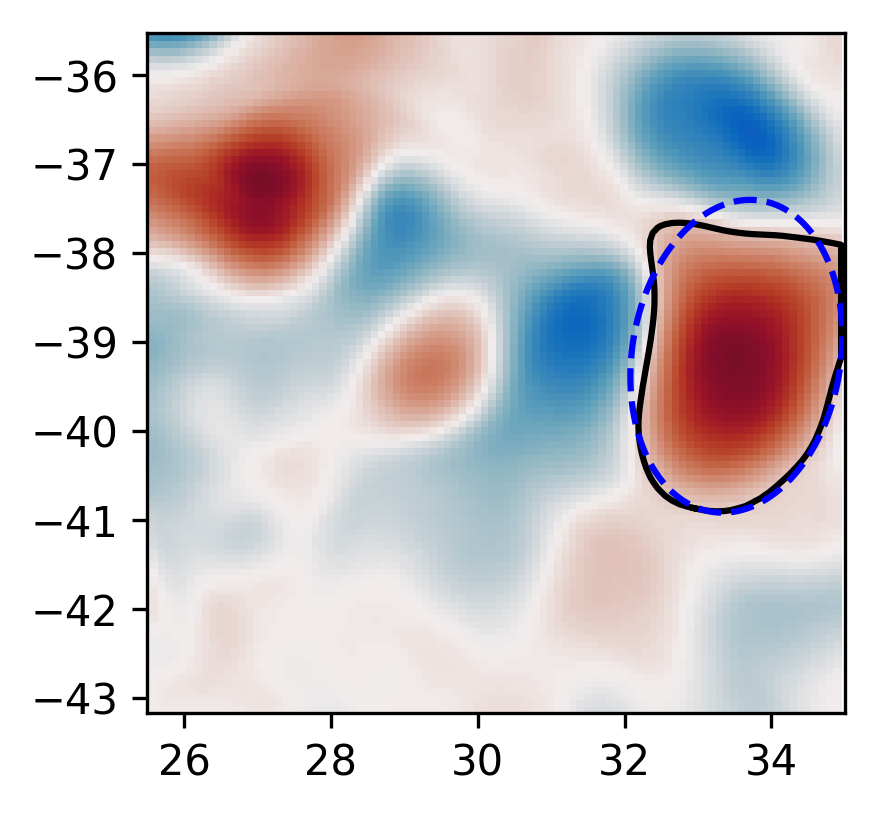

In [12]:
plt.figure(figsize=[3,3],dpi=300)
plot(eddytd1['eddyn_0']['contour'][0][0],eddytd1['eddyn_0']['contour'][0][1],'-k')
plot(eddytd1['eddyn_0']['ellipse'][0][0],eddytd1['eddyn_0']['ellipse'][0][1],'--b')
pcolormesh(x[areamap[0,0]:areamap[0,1]],y[areamap[1,0]:areamap[1,1]],\
           eta[0,areamap[1,0]:areamap[1,1],areamap[0,0]:areamap[0,1]]\
           -ssh_mean[areamap[1,0]:areamap[1,1],areamap[0,0]:areamap[0,1]],cmap=cm.cm.balance,vmin=-80,vmax=80)
xlim([25.5,35])

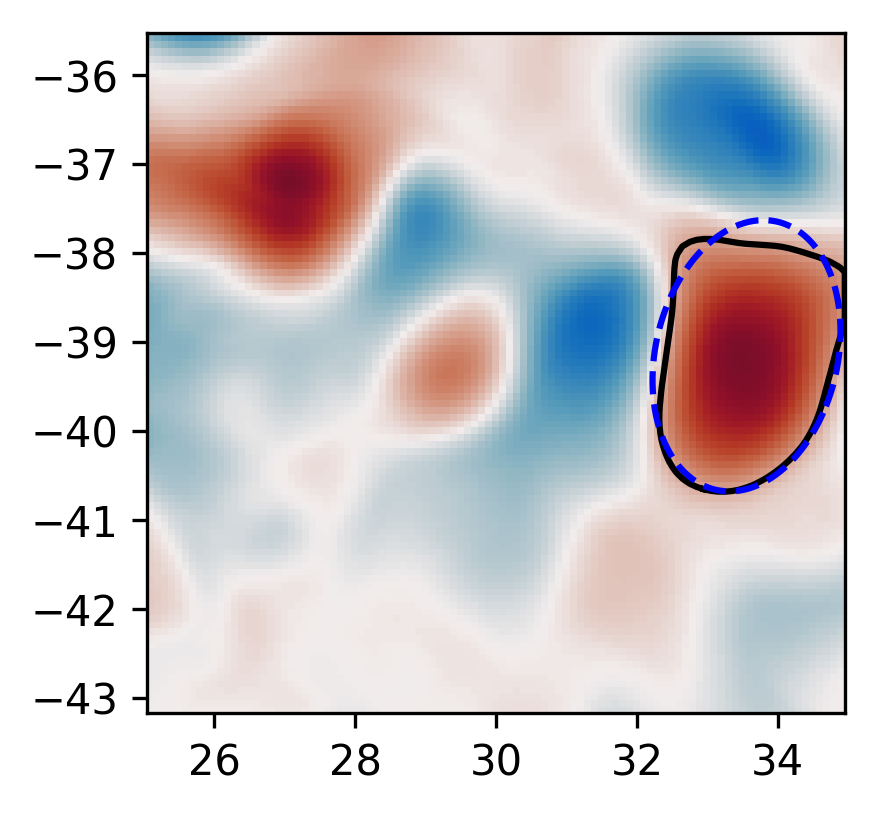

In [13]:
plt.figure(figsize=[3,3],dpi=300)
plot(eddytd2['eddyn_0']['contour'][0][0],eddytd2['eddyn_0']['contour'][0][1],'-k')
plot(eddytd2['eddyn_0']['ellipse'][0][0],eddytd2['eddyn_0']['ellipse'][0][1],'--b')
pcolormesh(x[areamap[0,0]:areamap[0,1]],y[areamap[1,0]:areamap[1,1]],\
           eta[0,areamap[1,0]:areamap[1,1],areamap[0,0]:areamap[0,1]]\
           -ssh_mean[areamap[1,0]:areamap[1,1],areamap[0,0]:areamap[0,1]],cmap=cm.cm.balance,vmin=-80,vmax=80)
#ylim([-40.5,-34.5])

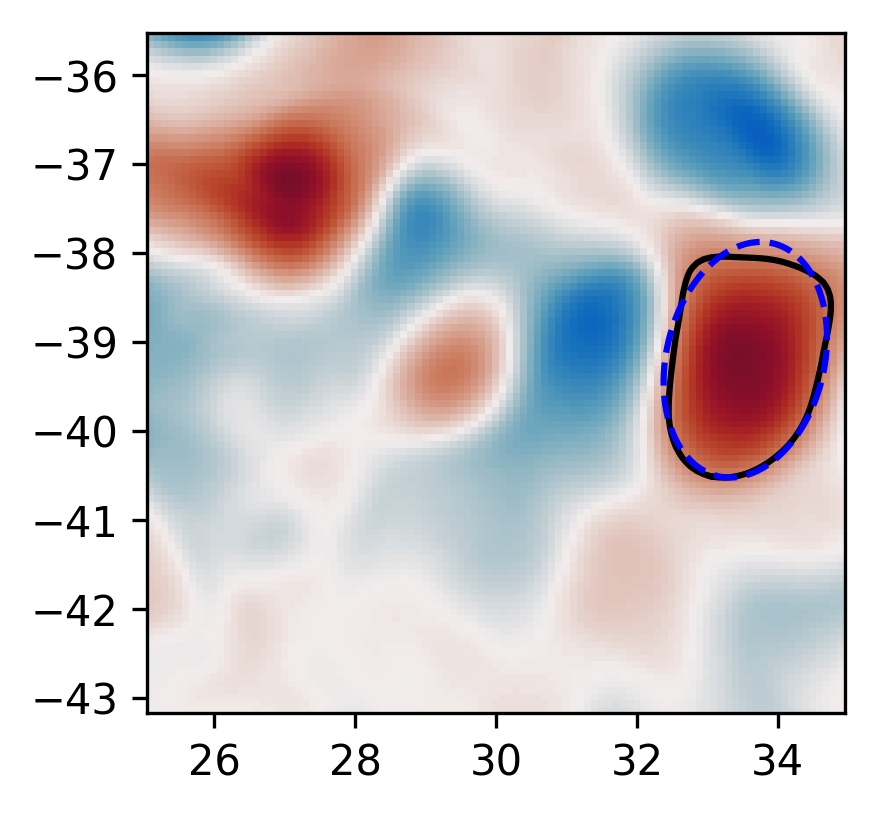

In [14]:
plt.figure(figsize=[3,3],dpi=300)
plot(eddytd3['eddyn_0']['contour'][0][0],eddytd3['eddyn_0']['contour'][0][1],'-k')
plot(eddytd3['eddyn_0']['ellipse'][0][0],eddytd3['eddyn_0']['ellipse'][0][1],'--b')
pcolormesh(x[areamap[0,0]:areamap[0,1]],y[areamap[1,0]:areamap[1,1]],\
           eta[0,areamap[1,0]:areamap[1,1],areamap[0,0]:areamap[0,1]]\
           -ssh_mean[areamap[1,0]:areamap[1,1],areamap[0,0]:areamap[0,1]],cmap=cm.cm.balance,vmin=-80,vmax=80)

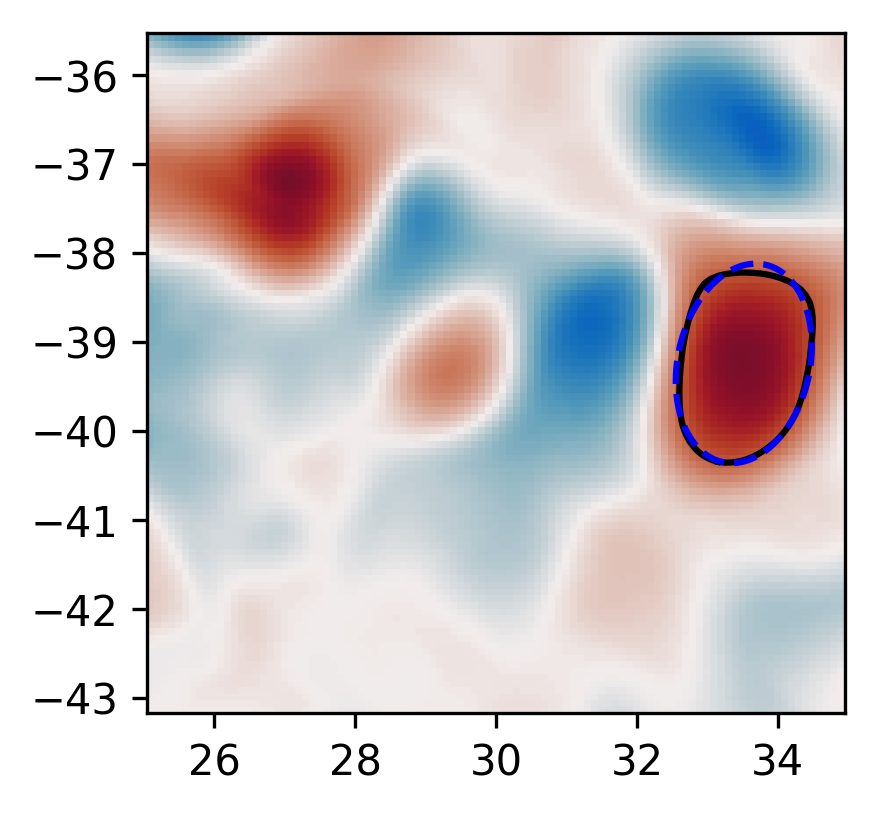

In [15]:
plt.figure(figsize=[3,3],dpi=300)
plot(eddytd4['eddyn_0']['contour'][0][0],eddytd4['eddyn_0']['contour'][0][1],'-k')
plot(eddytd4['eddyn_0']['ellipse'][0][0],eddytd4['eddyn_0']['ellipse'][0][1],'--b')
pcolormesh(x[areamap[0,0]:areamap[0,1]],y[areamap[1,0]:areamap[1,1]],\
           eta[0,areamap[1,0]:areamap[1,1],areamap[0,0]:areamap[0,1]]\
           -ssh_mean[areamap[1,0]:areamap[1,1],areamap[0,0]:areamap[0,1]],cmap=cm.cm.balance,vmin=-80,vmax=80)

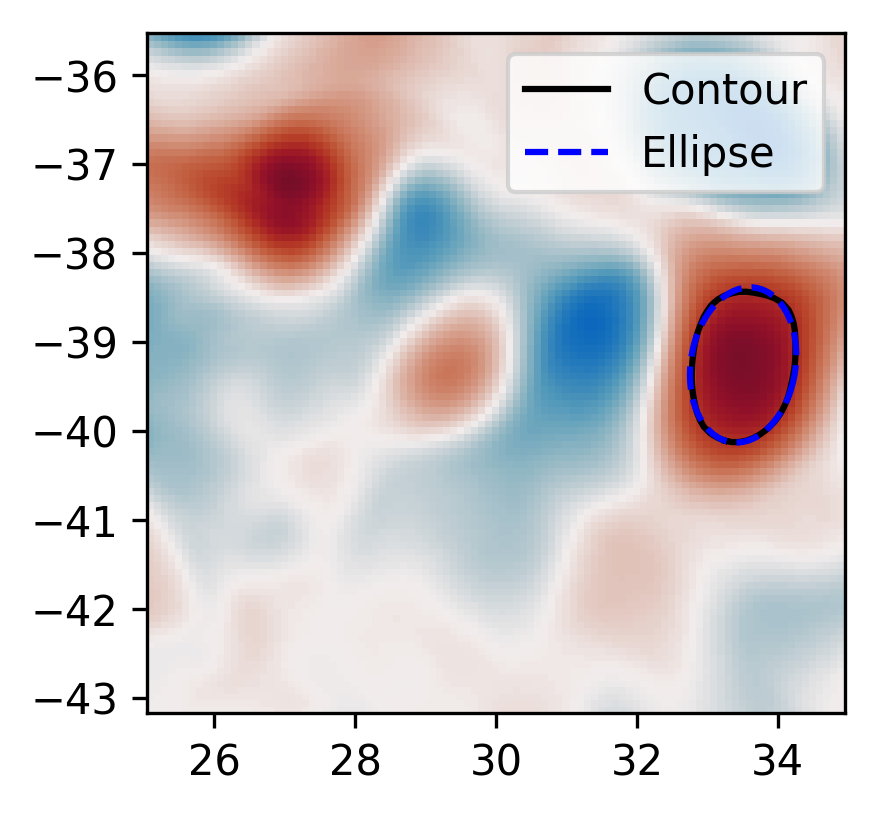

In [16]:
plt.figure(figsize=[3,3],dpi=300)
plot(eddytd5['eddyn_0']['contour'][0][0],eddytd5['eddyn_0']['contour'][0][1],'-k',label='Contour')
plot(eddytd5['eddyn_0']['ellipse'][0][0],eddytd5['eddyn_0']['ellipse'][0][1],'--b',label='Ellipse')
pcolormesh(x[areamap[0,0]:areamap[0,1]],y[areamap[1,0]:areamap[1,1]],\
           eta[0,areamap[1,0]:areamap[1,1],areamap[0,0]:areamap[0,1]]\
           -ssh_mean[areamap[1,0]:areamap[1,1],areamap[0,0]:areamap[0,1]],cmap=cm.cm.balance,vmin=-80,vmax=80)
legend()

In [17]:
##### %matplotlib inline
eddytd3=analyseddyzt(eta,lon,lat,0,1,1,50,1,1,data_meant=ssh_mean,areamap=areamap,mask=''\
                     ,eccenfit=1,ellipsrsquarefit=0.95,gaussrsquarefit=0,maskopt='contour'\
                     ,destdir='',physics='',diagnostics=False,pprint=False,sfilter='uniform')

 0% [>]100% Time Elapsed: 5 s  Number of contours analysed: 5 


In [18]:
##### %matplotlib inline
eddytd3n=analyseddyzt(eta,lon,lat,0,1,1,-40,-1,-1,data_meant=ssh_mean,areamap=areamap,mask=''\
                     ,eccenfit=1,ellipsrsquarefit=0.95,gaussrsquarefit=0,maskopt='contour'\
                     ,destdir='',physics='',diagnostics=False,pprint=False,sfilter='uniform')

 0% [>]100% Time Elapsed: 5 s  Number of contours analysed: 7 


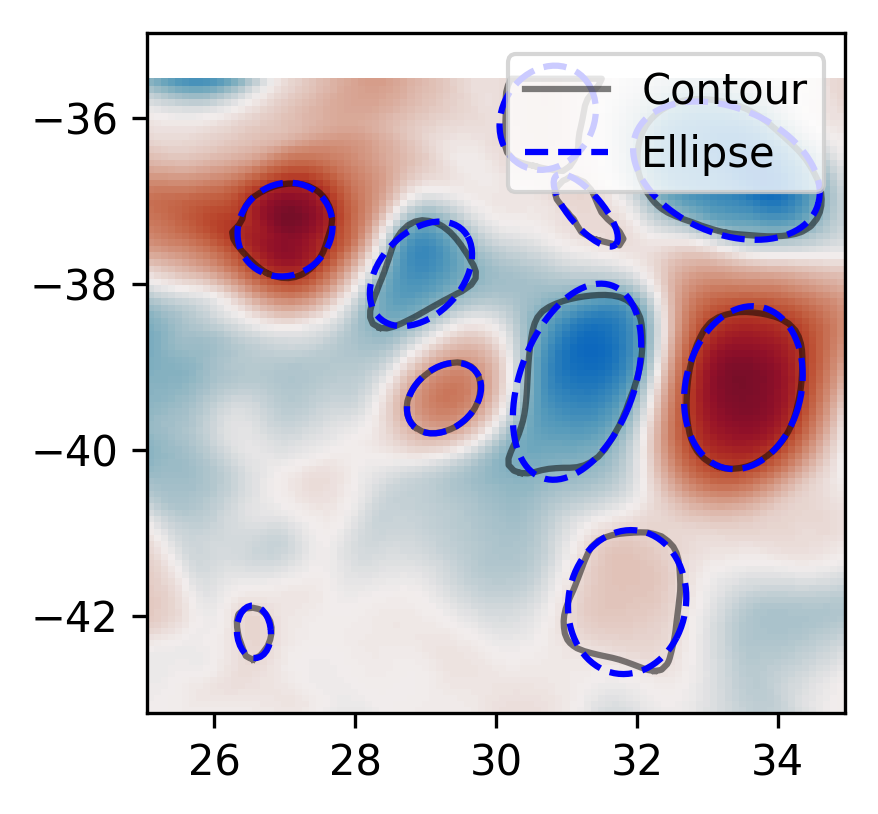

In [19]:
plt.figure(figsize=[3,3],dpi=300)
pcolormesh(x[areamap[0,0]:areamap[0,1]],y[areamap[1,0]:areamap[1,1]],\
           eta[0,areamap[1,0]:areamap[1,1],areamap[0,0]:areamap[0,1]]\
           -ssh_mean[areamap[1,0]:areamap[1,1],areamap[0,0]:areamap[0,1]],cmap=cm.cm.balance,vmin=-80,vmax=80)
count=0
for key,value in eddytd3.items():

    plot(value['contour'][0][0],value['contour'][0][1],'-k',alpha=0.5,label='Contour')
    plot(value['ellipse'][0][0],value['ellipse'][0][1],'--b',label='Ellipse')
    if count==0:
        legend(loc=1)
        count=1
for key,value in eddytd3n.items():
    plot(value['contour'][0][0],value['contour'][0][1],'-k',alpha=0.5,label='Contour')
    plot(value['ellipse'][0][0],value['ellipse'][0][1],'--b',label='Ellipse')
#legend()


In [20]:
fieldSp=reconstruct_syntetic(shape(eta),lon,lat,eddytd3,diagnostics=False)

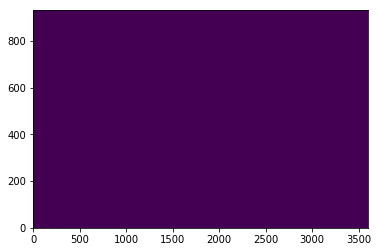

In [21]:
pcolormesh(fieldSp[1,:,:])

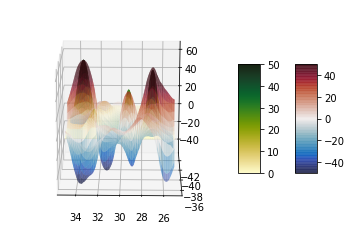

In [22]:
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import cmocean as cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

fig = plt.figure()
ax = fig.gca(projection='3d')

Lon,Lat=meshgrid(lon, lat)
surf = ax.plot_surface(Lon[areamap[1,0]:areamap[1,1],areamap[0,0]:areamap[0,1]],\
                       Lat[areamap[1,0]:areamap[1,1],areamap[0,0]:areamap[0,1]],\
                       eta[0,areamap[1,0]:areamap[1,1],areamap[0,0]:areamap[0,1]]\
                       -ssh_mean[areamap[1,0]:areamap[1,1],areamap[0,0]:areamap[0,1]],\
                       cmap=cm.cm.balance,vmin=-50,vmax=50,\
                       alpha=0.5,shade='gouraud',antialiased=True)
fig.colorbar(surf, shrink=0.5, aspect=5)

ssurf = ax.plot_surface(Lon[areamap[1,0]:areamap[1,1],areamap[0,0]:areamap[0,1]],\
                        Lat[areamap[1,0]:areamap[1,1],areamap[0,0]:areamap[0,1]],\
                       fieldSp[0,areamap[1,0]:areamap[1,1],areamap[0,0]:areamap[0,1]],\
                       cmap=cm.cm.speed,vmin=0,vmax=50,\
                       alpha=1,shade='gouraud',antialiased=True)
ax.view_init(18, 91)
fig.colorbar(ssurf, shrink=0.5, aspect=5)

In [23]:
test=twoD_Gaussian((Lon,Lat,eddytd2['eddyn_0']['position_maxvalue'][0][2],\
                    eddytd2['eddyn_0']['position_maxvalue'][0][0],eddytd2['eddyn_0']['position_maxvalue'][0][1]),\
                   *eddytd2['eddyn_0']['2dgaussianfit'][0,:]).reshape(len(lat),len(lon))

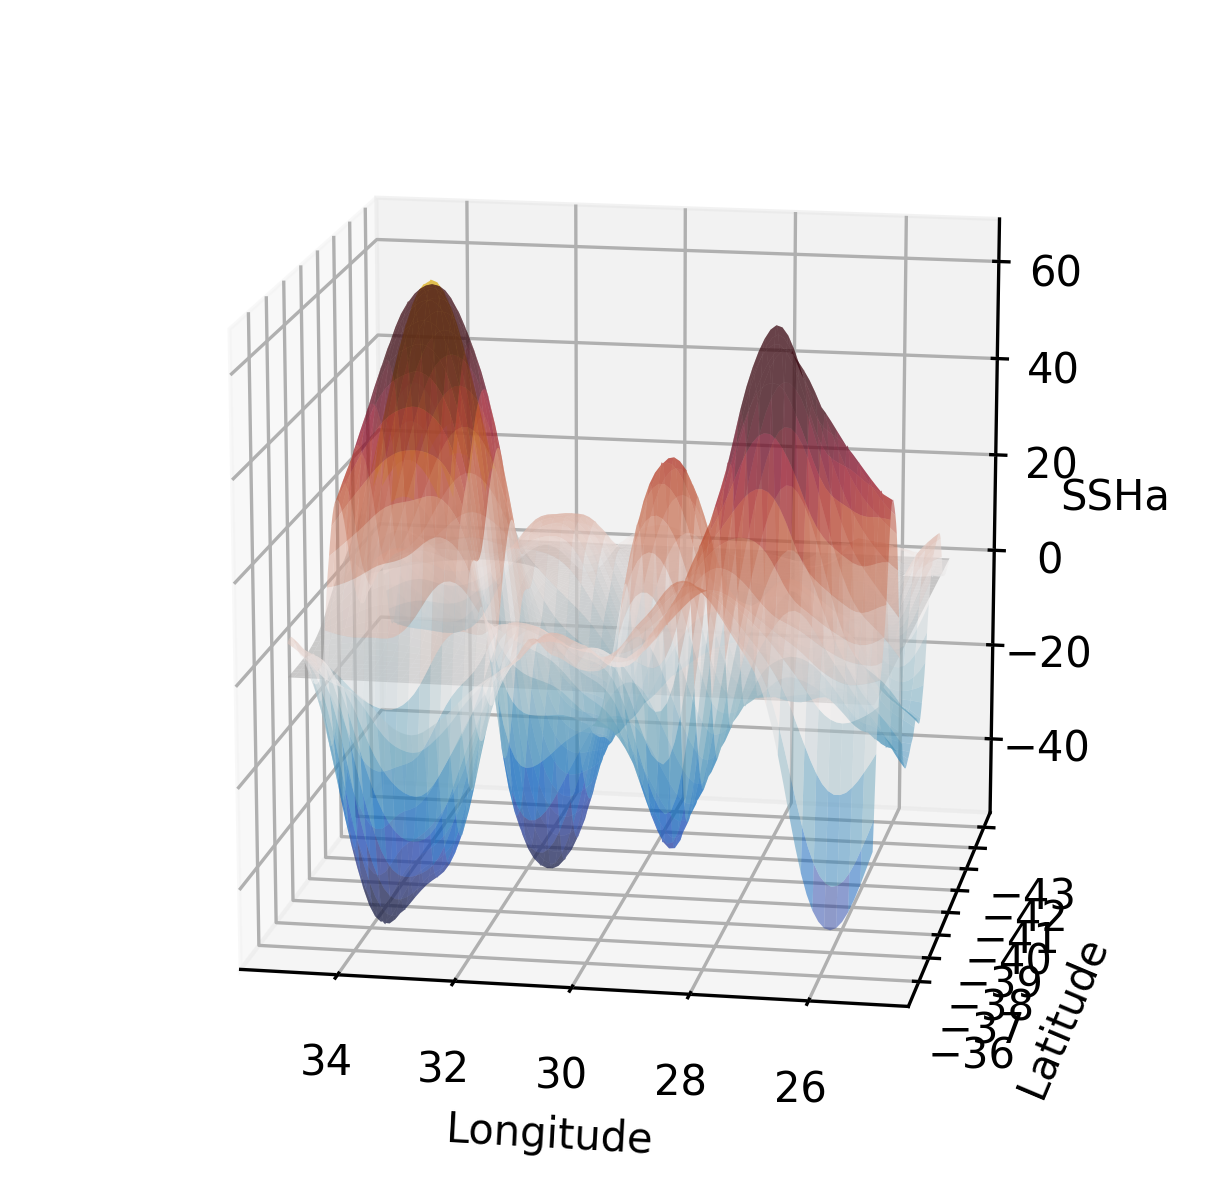

In [24]:
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import cmocean as cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

fig = plt.figure(figsize=(5,5),dpi=300)
ax = fig.gca(projection='3d')

Lon,Lat=meshgrid(lon, lat)
surf = ax.plot_surface(Lon[areamap[1,0]:areamap[1,1],areamap[0,0]:areamap[0,1]],\
                       Lat[areamap[1,0]:areamap[1,1],areamap[0,0]:areamap[0,1]],\
                       eta[0,areamap[1,0]:areamap[1,1],areamap[0,0]:areamap[0,1]]\
                       -ssh_mean[areamap[1,0]:areamap[1,1],areamap[0,0]:areamap[0,1]],cmap=cm.cm.balance,vmin=-50,vmax=50,\
                       alpha=0.5,shade='gouraud',antialiased=True)
#fig.colorbar(surf, shrink=0.8, aspect=10)

ssurf = ax.plot_surface(Lon[areamap[1,0]:areamap[1,1],areamap[0,0]:areamap[0,1]],\
                       Lat[areamap[1,0]:areamap[1,1],areamap[0,0]:areamap[0,1]],\
                       test[areamap[1,0]:areamap[1,1],areamap[0,0]:areamap[0,1]],\
                       cmap=cm.cm.oxy,vmin=-50,vmax=50,\
                       alpha=0.5,shade='gouraud',antialiased=True)
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_zlabel('SSHa')
ax.view_init(15, 100)
#fig.colorbar(ssurf, shrink=0.8, aspect=10)

Text(0,0.5,'Latitude')

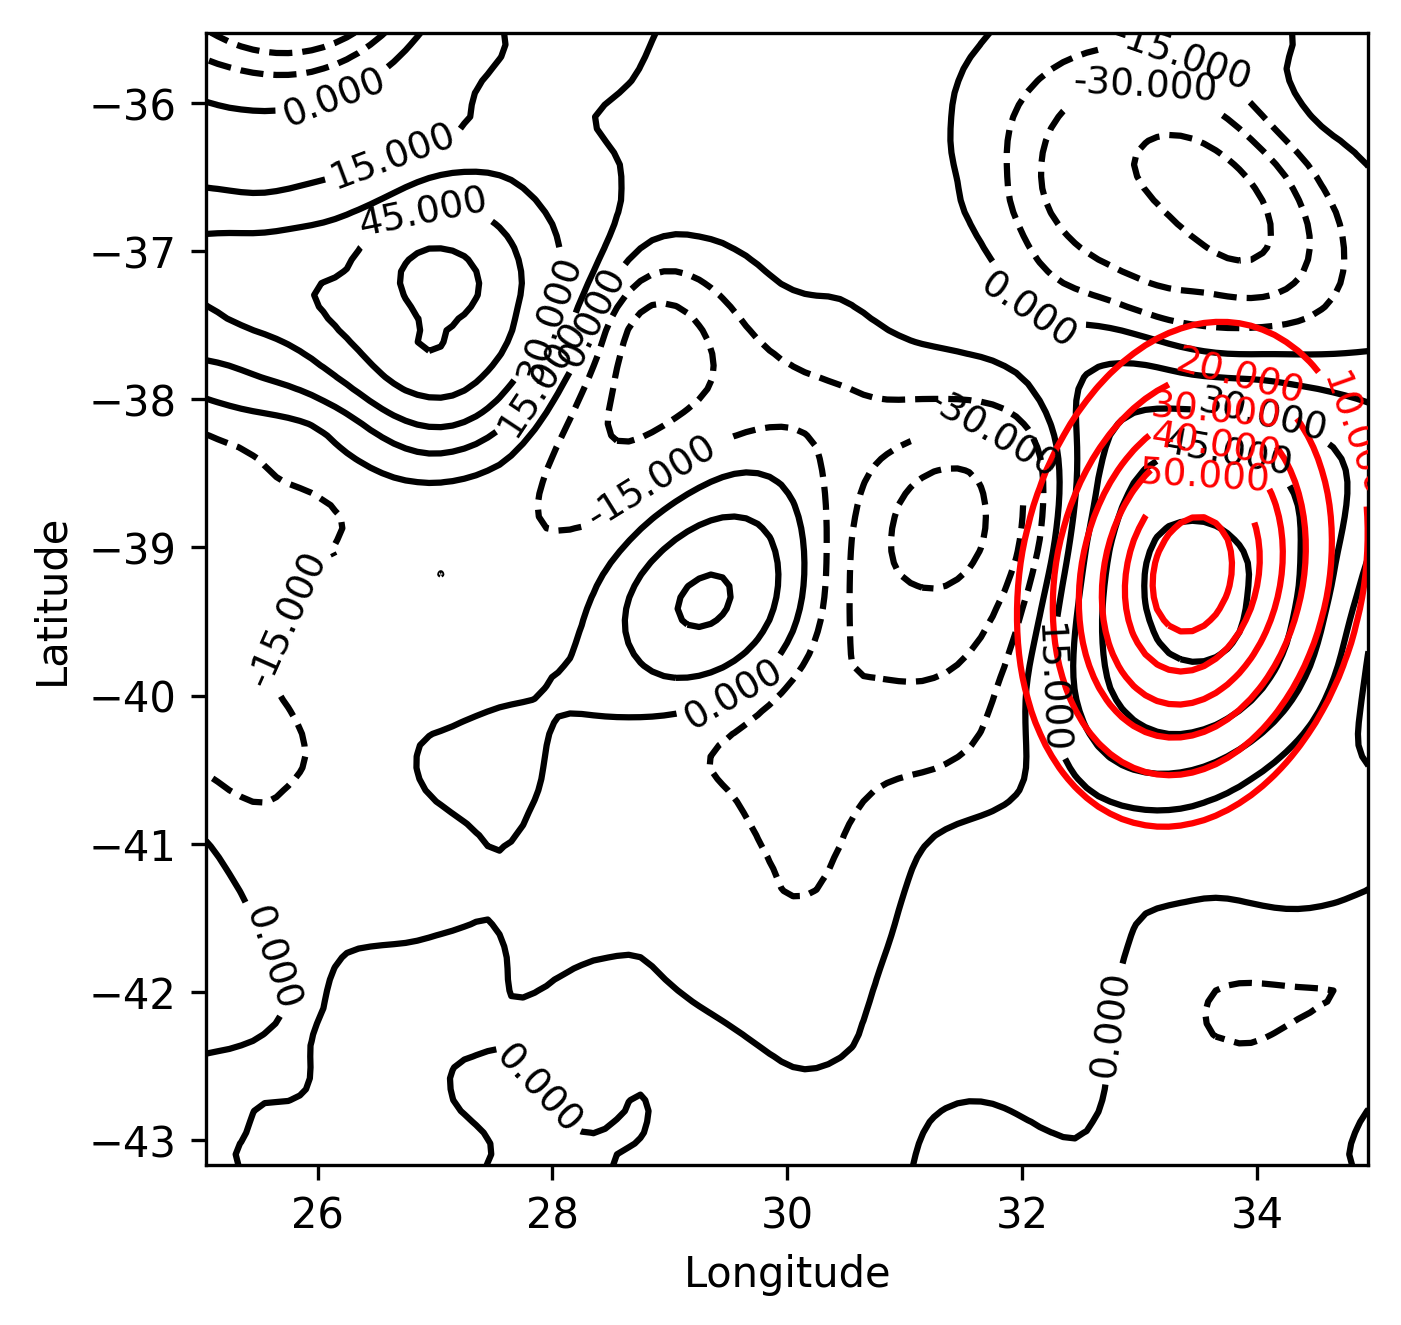

In [25]:
fig = plt.figure(figsize=(5,5),dpi=300)

CS=contour(Lon[areamap[1,0]:areamap[1,1],areamap[0,0]:areamap[0,1]],\
                       Lat[areamap[1,0]:areamap[1,1],areamap[0,0]:areamap[0,1]],\
                       eta[0,areamap[1,0]:areamap[1,1],areamap[0,0]:areamap[0,1]]\
                       -ssh_mean[areamap[1,0]:areamap[1,1],areamap[0,0]:areamap[0,1]],vmin=-50,vmax=50,colors='k')
clabel(CS, fontsize=9, inline=1)
#fig.colorbar(surf, shrink=0.8, aspect=10)

CS=contour(Lon[areamap[1,0]:areamap[1,1],areamap[0,0]:areamap[0,1]],\
                       Lat[areamap[1,0]:areamap[1,1],areamap[0,0]:areamap[0,1]],\
                       test[areamap[1,0]:areamap[1,1],areamap[0,0]:areamap[0,1]],vmin=-50,vmax=50,colors='r')
clabel(CS, fontsize=9, inline=1)

xlabel('Longitude')
ylabel('Latitude')

#ax.view_init(15, 100)
#fig.colorbar(ssurf, shrink=0.8, aspect=10)

In [26]:
eddytd3['eddyn_0']['2dgaussianfit'][0]

array([0.54643778, 0.66624612, 0.33203109, 0.        , 0.        ,
       0.        ])

In [27]:
%matplotlib inline
eddytdn=analyseddyzt(eta,lon,lat,0,60,1,-40,-20,-1,data_meant=ssh_mean,areamap=areamap,mask=''\
                     ,eccenfit=0.99,ellipsrsquarefit=0,gaussrsquarefit=0\
                     ,destdir='',physics='',diagnostics=False,pprint=False,sfilter='uniform',)


 0% [===========================================================>]100% Time Elapsed: 164 s  Number of contours analysed: 168 


In [28]:
test=twoD_Gaussian((Lon,Lat,eddytdn['eddyn_0']['position_maxvalue'][0][2],\
                    eddytdn['eddyn_0']['position_maxvalue'][0][0],eddytdn['eddyn_0']['position_maxvalue'][0][1]),\
                   *eddytdn['eddyn_0']['2dgaussianfit'][0,:]).reshape(len(lat),len(lon))

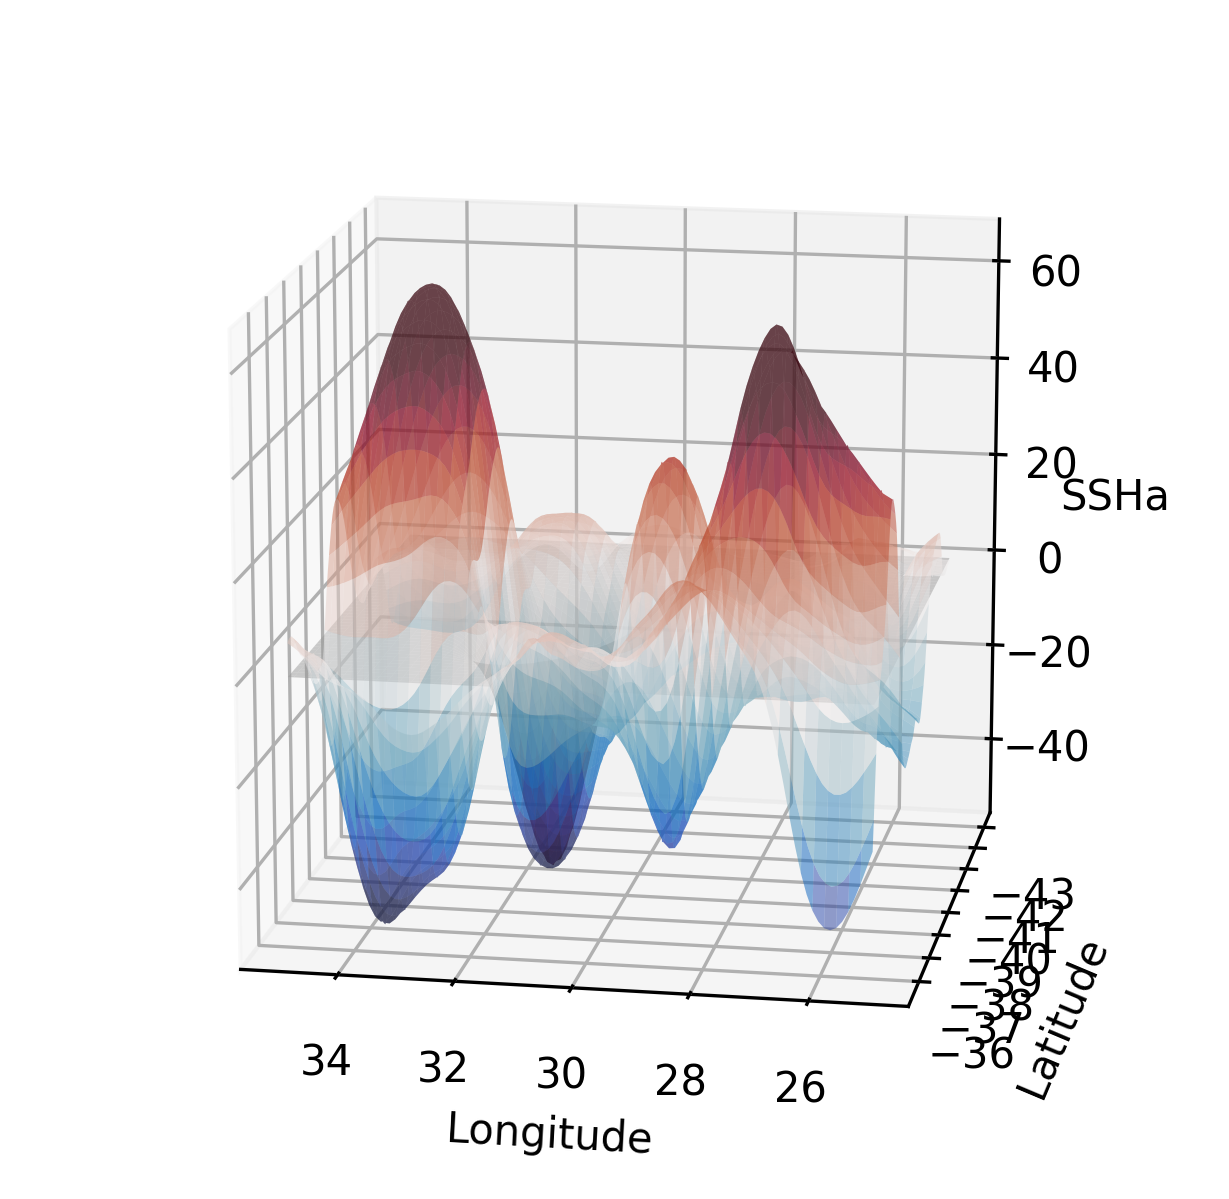

In [29]:
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import cmocean as cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

fig = plt.figure(figsize=(5,5),dpi=300)
ax = fig.gca(projection='3d')

Lon,Lat=meshgrid(lon, lat)
surf = ax.plot_surface(Lon[areamap[1,0]:areamap[1,1],areamap[0,0]:areamap[0,1]],\
                       Lat[areamap[1,0]:areamap[1,1],areamap[0,0]:areamap[0,1]],\
                       eta[0,areamap[1,0]:areamap[1,1],areamap[0,0]:areamap[0,1]]\
                       -ssh_mean[areamap[1,0]:areamap[1,1],areamap[0,0]:areamap[0,1]],cmap=cm.cm.balance,vmin=-50,vmax=50,\
                       alpha=0.5,shade='gouraud',antialiased=True)
#fig.colorbar(surf, shrink=0.8, aspect=10)
ssurf = ax.plot_surface(Lon[areamap[1,0]:areamap[1,1],areamap[0,0]:areamap[0,1]],\
                       Lat[areamap[1,0]:areamap[1,1],areamap[0,0]:areamap[0,1]],\
                       test[areamap[1,0]:areamap[1,1],areamap[0,0]:areamap[0,1]],\
                       cmap=cm.cm.oxy,vmin=-50,vmax=50,\
                       alpha=0.5,shade='gouraud',antialiased=True)
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_zlabel('SSHa')
ax.view_init(15, 100)
#fig.colorbar(ssurf, shrink=0.8, aspect=10)

Text(0,0.5,'Latitude')

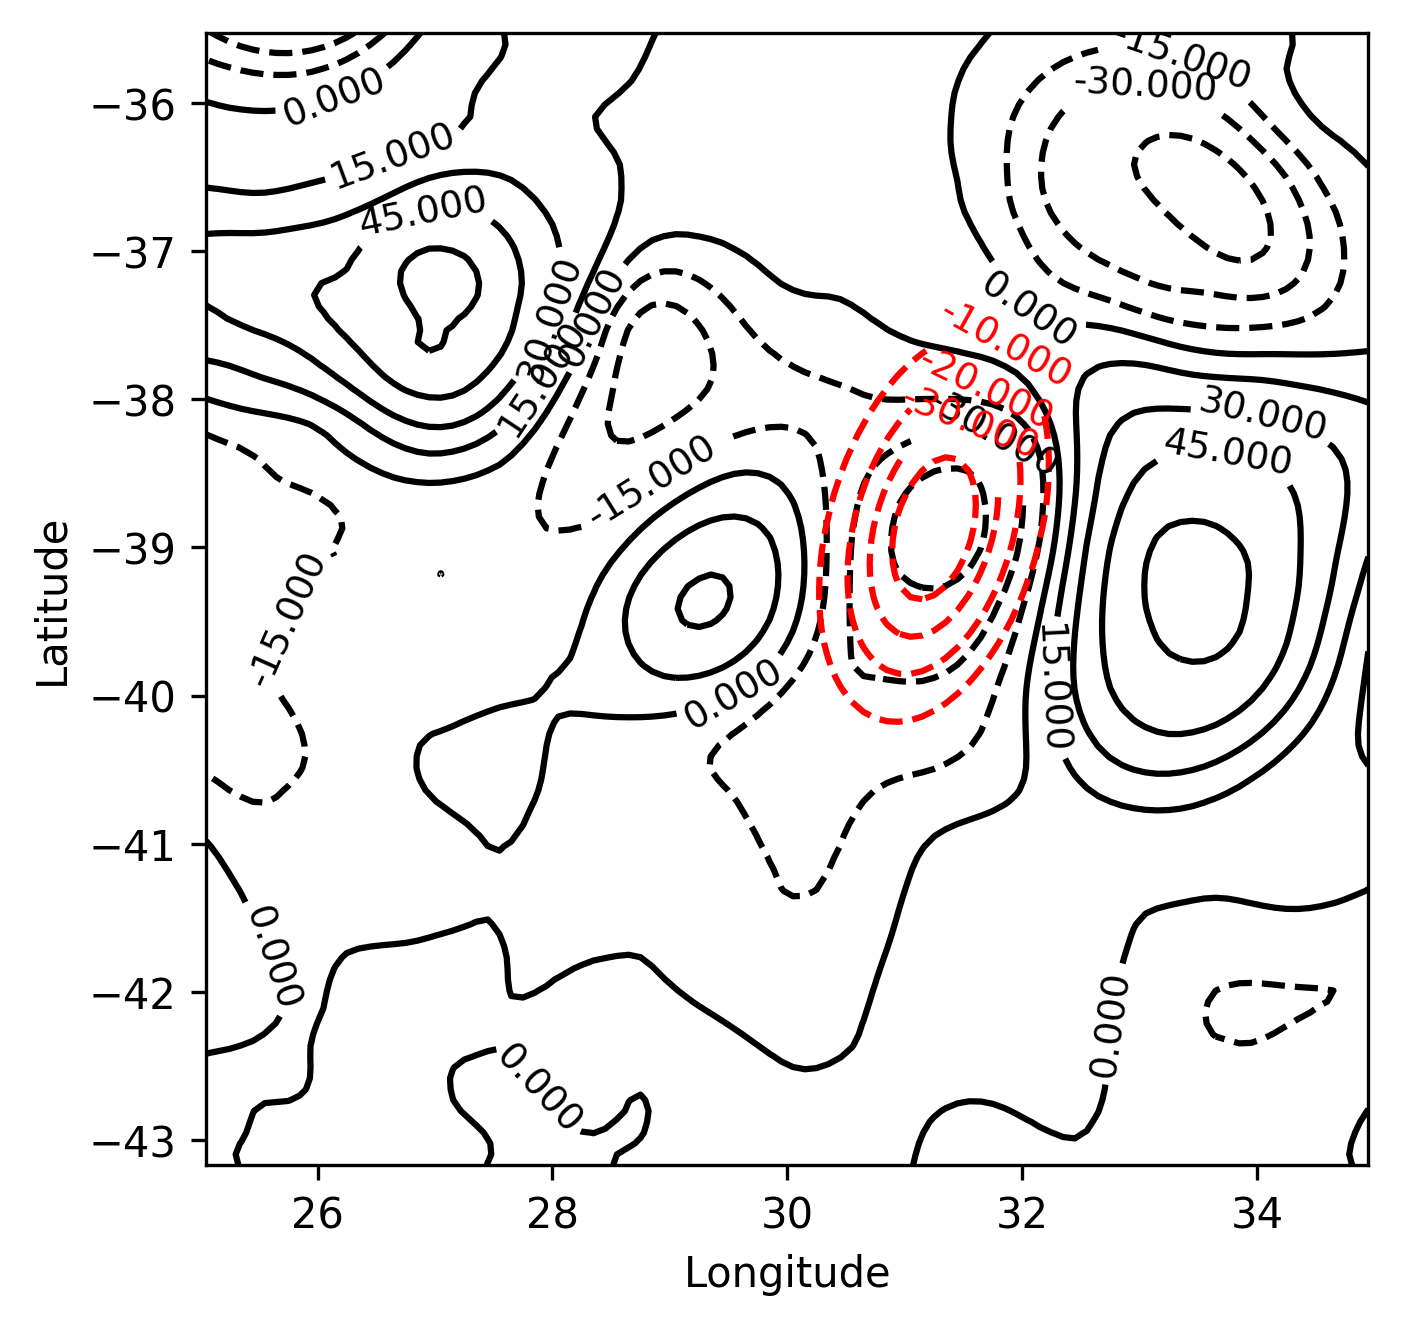

In [30]:
fig = plt.figure(figsize=(5,5),dpi=300)

CS=contour(Lon[areamap[1,0]:areamap[1,1],areamap[0,0]:areamap[0,1]],\
                       Lat[areamap[1,0]:areamap[1,1],areamap[0,0]:areamap[0,1]],\
                       eta[0,areamap[1,0]:areamap[1,1],areamap[0,0]:areamap[0,1]]\
                       -ssh_mean[areamap[1,0]:areamap[1,1],areamap[0,0]:areamap[0,1]],vmin=-50,vmax=50,colors='k')
clabel(CS, fontsize=9, inline=1)
#fig.colorbar(surf, shrink=0.8, aspect=10)

CS=contour(Lon[areamap[1,0]:areamap[1,1],areamap[0,0]:areamap[0,1]],\
                       Lat[areamap[1,0]:areamap[1,1],areamap[0,0]:areamap[0,1]],\
                       test[areamap[1,0]:areamap[1,1],areamap[0,0]:areamap[0,1]],vmin=-50,vmax=50,colors='r',levels=range(-50,0,10))
clabel(CS, fontsize=9, inline=1)

xlabel('Longitude')
ylabel('Latitude')

#ax.view_init(15, 100)
#fig.colorbar(ssurf, shrink=0.8, aspect=10)

# Plot time-steps of the original Field and Syntetic

In [31]:
fieldSn=reconstruct_syntetic(shape(eta),lon,lat,eddytdn)

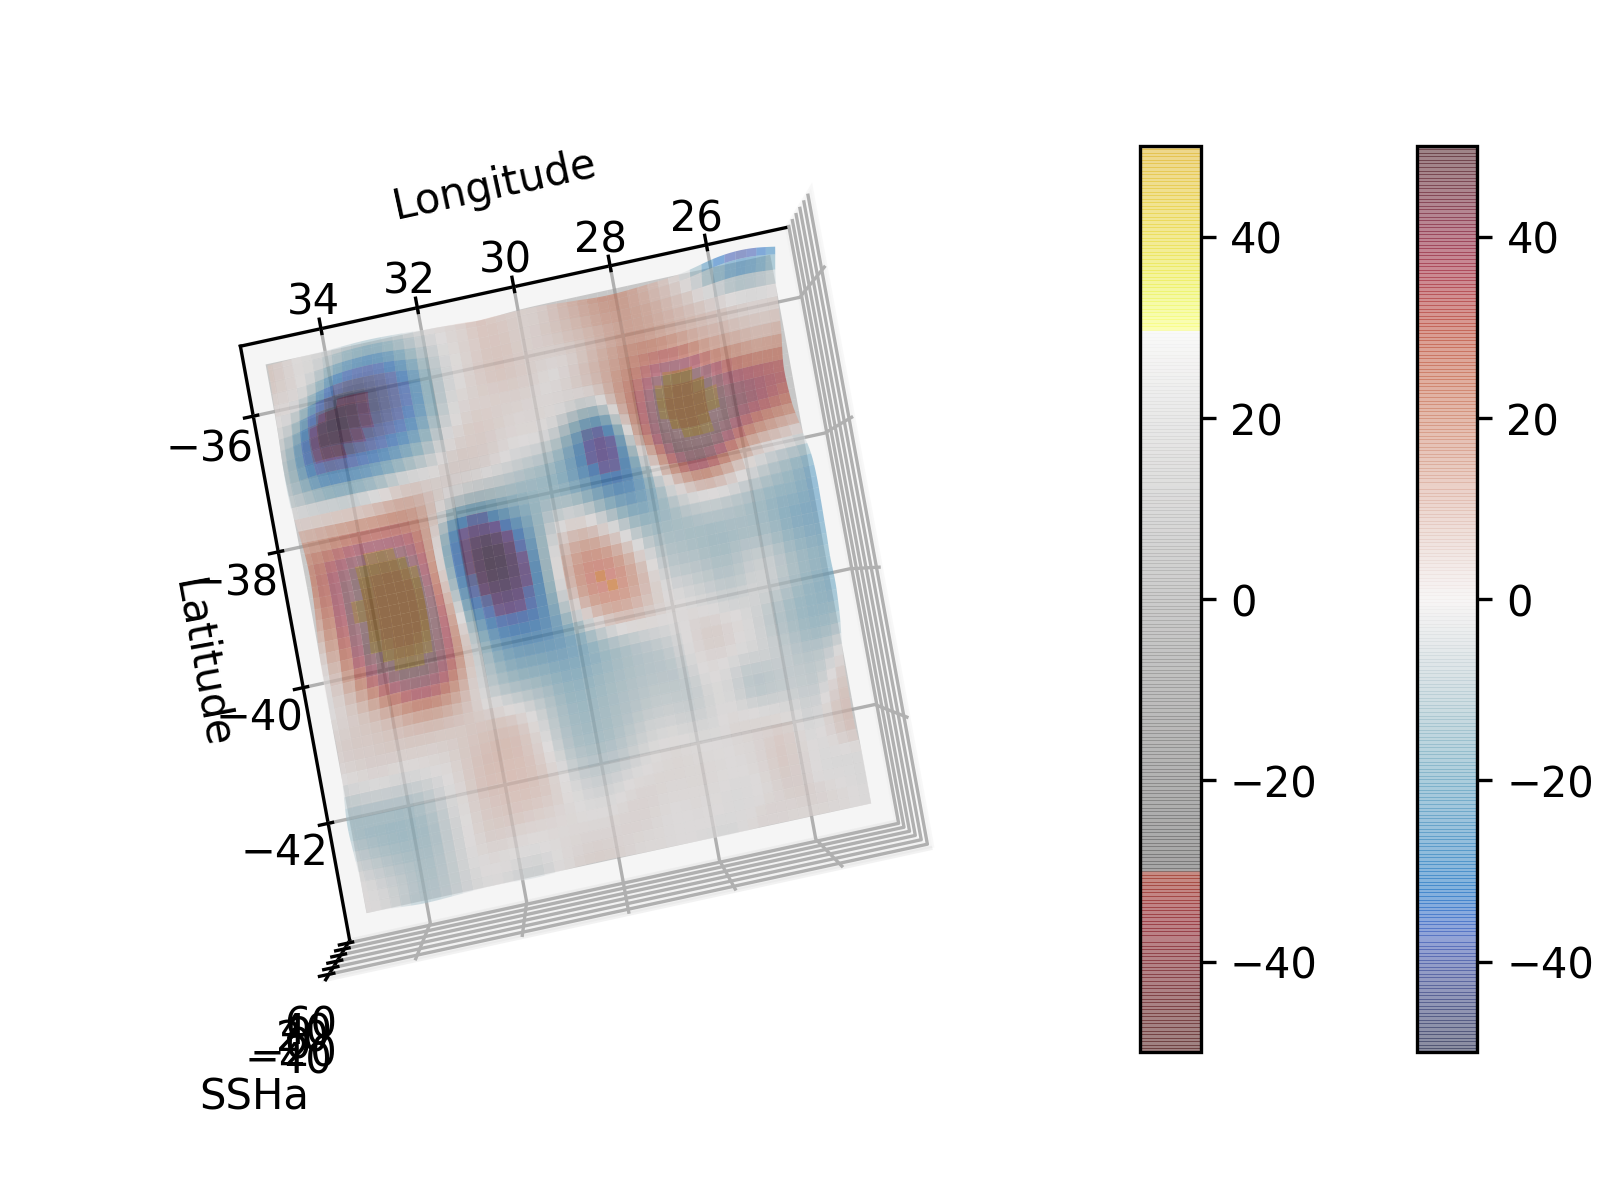

In [32]:
fig = plt.figure(figsize=(7,5),dpi=300)
ax = fig.gca(projection='3d')

Lon,Lat=meshgrid(lon, lat)
surf = ax.plot_surface(Lon[areamap[1,0]:areamap[1,1],areamap[0,0]:areamap[0,1]],\
                       Lat[areamap[1,0]:areamap[1,1],areamap[0,0]:areamap[0,1]],\
                       eta[0,areamap[1,0]:areamap[1,1],areamap[0,0]:areamap[0,1]]\
                       -ssh_mean[areamap[1,0]:areamap[1,1],areamap[0,0]:areamap[0,1]],\
                       cmap=cm.cm.balance,vmin=-50,vmax=50,\
                       alpha=0.5,shade='gouraud',antialiased=True)
fig.colorbar(surf, shrink=0.8, aspect=15)

ssurf = ax.plot_surface(Lon[areamap[1,0]:areamap[1,1],areamap[0,0]:areamap[0,1]],\
                        Lat[areamap[1,0]:areamap[1,1],areamap[0,0]:areamap[0,1]],\
                        fieldSp[0,areamap[1,0]:areamap[1,1],areamap[0,0]:areamap[0,1]]\
                        +fieldSn[0,areamap[1,0]:areamap[1,1],areamap[0,0]:areamap[0,1]],\
                        cmap=cm.cm.oxy,vmin=-50,vmax=50,\
                        alpha=0.5,shade='gouraud',antialiased=True)
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_zlabel('SSHa')
fig.colorbar(ssurf, shrink=0.8, aspect=15)
ax.view_init(-90, 100)

Text(0,0.5,'Latitude')

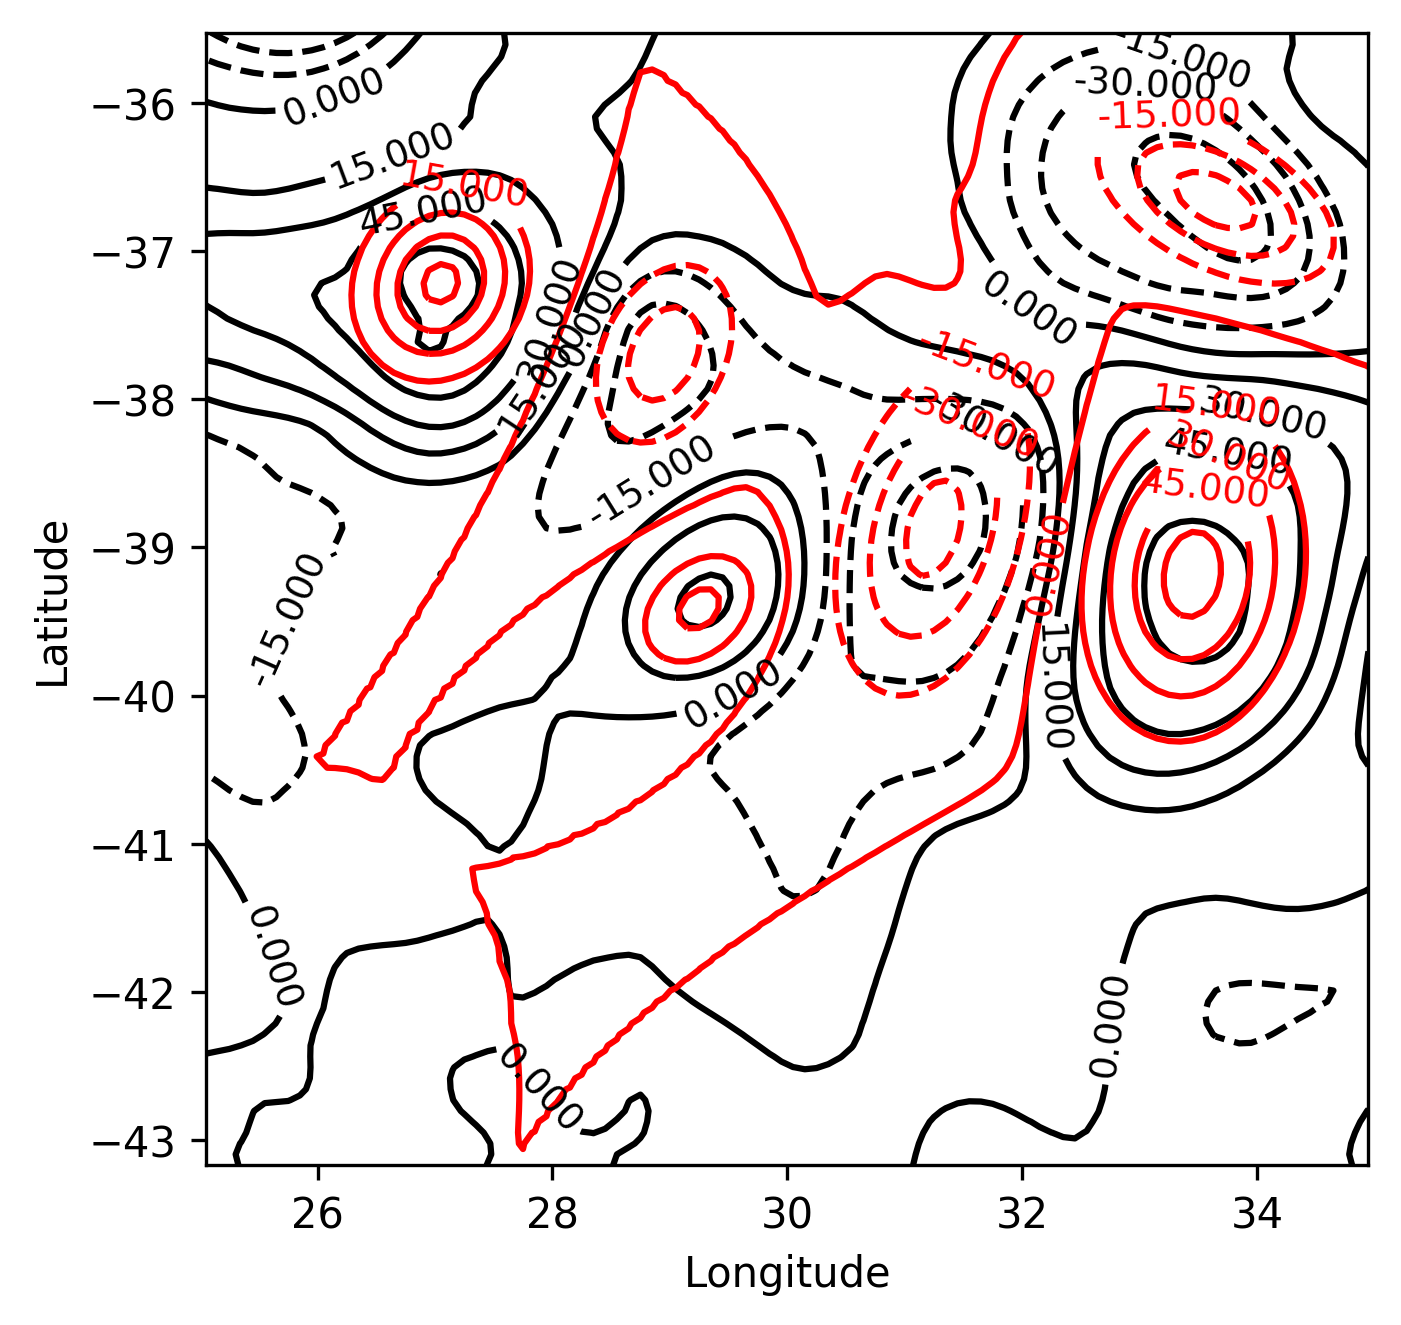

In [33]:
fig = plt.figure(figsize=(5,5),dpi=300)

CS=contour(Lon[areamap[1,0]:areamap[1,1],areamap[0,0]:areamap[0,1]],\
                       Lat[areamap[1,0]:areamap[1,1],areamap[0,0]:areamap[0,1]],\
                       eta[0,areamap[1,0]:areamap[1,1],areamap[0,0]:areamap[0,1]]\
                       -ssh_mean[areamap[1,0]:areamap[1,1],areamap[0,0]:areamap[0,1]],vmin=-50,vmax=50,colors='k')
clabel(CS, fontsize=9, inline=1)
#fig.colorbar(surf, shrink=0.8, aspect=10)

CS=contour(Lon[areamap[1,0]:areamap[1,1],areamap[0,0]:areamap[0,1]],\
                       Lat[areamap[1,0]:areamap[1,1],areamap[0,0]:areamap[0,1]],\
                       fieldSp[0,areamap[1,0]:areamap[1,1],areamap[0,0]:areamap[0,1]]+\
                       fieldSn[0,areamap[1,0]:areamap[1,1],areamap[0,0]:areamap[0,1]],\
                       vmin=-50,vmax=50,colors='r')
clabel(CS, fontsize=9, inline=1)

xlabel('Longitude')
ylabel('Latitude')

#ax.view_init(15, 100)
#fig.colorbar(ssurf, shrink=0.8, aspect=10)

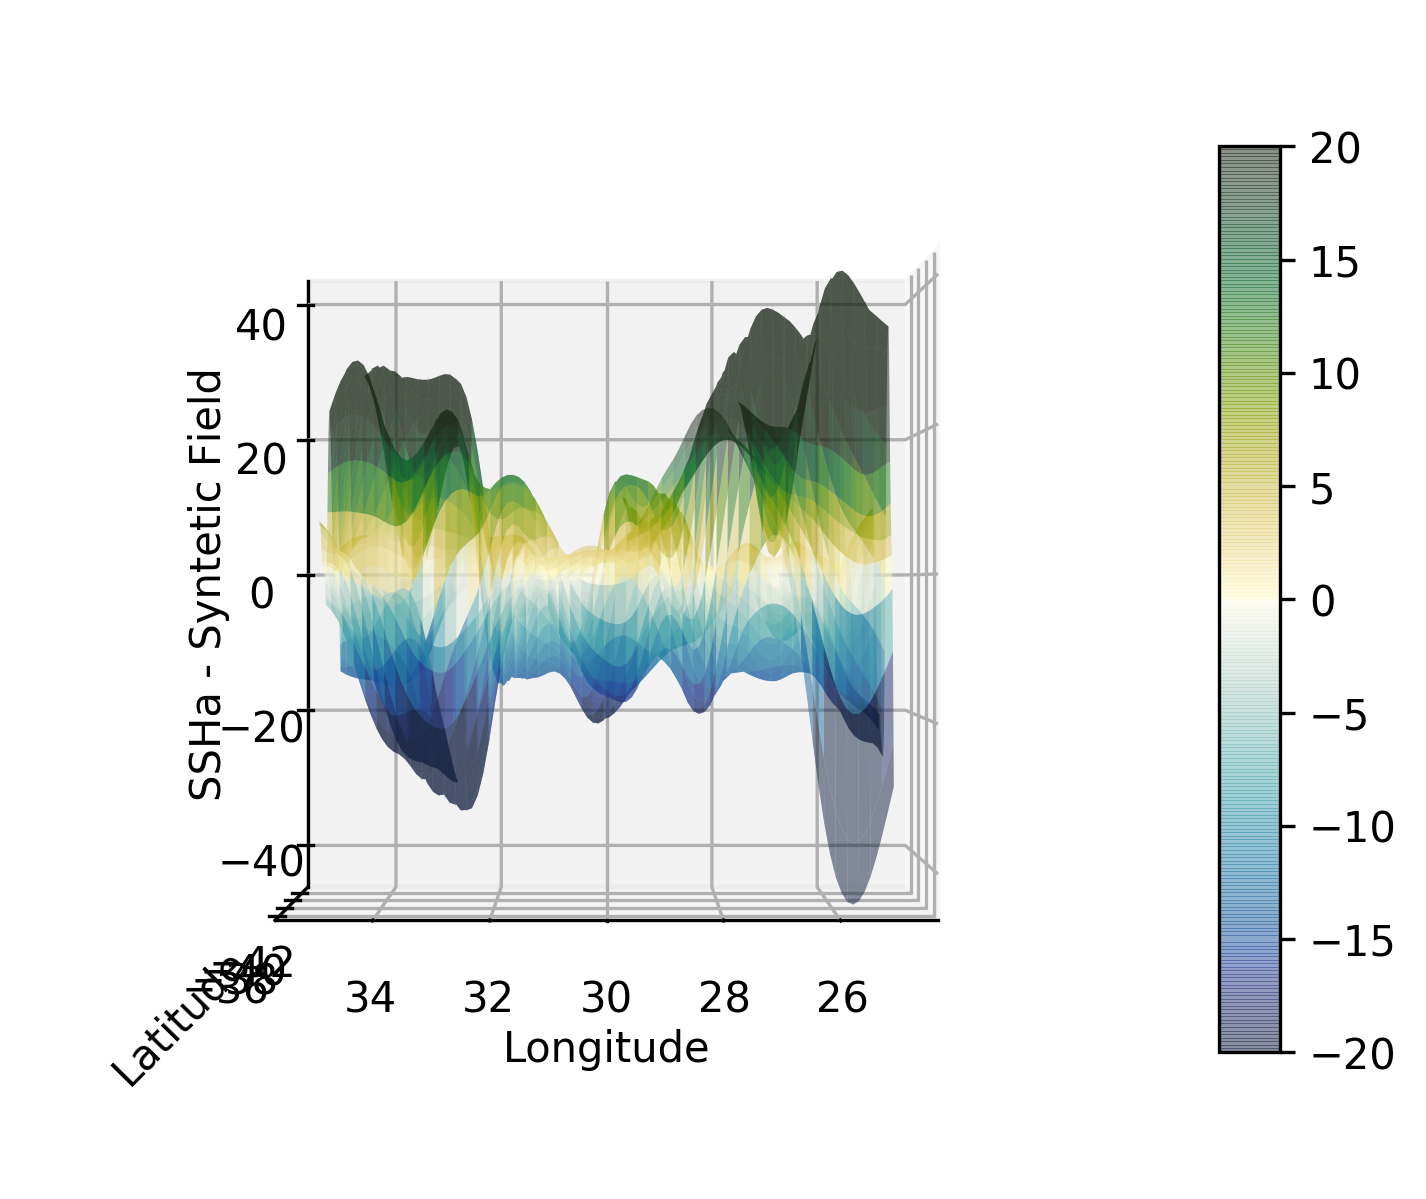

In [34]:
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import cmocean as cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

fig = plt.figure(figsize=(6,5),dpi=300)
ax = fig.gca(projection='3d')

Lon,Lat=meshgrid(lon, lat)
surf = ax.plot_surface(Lon[areamap[1,0]:areamap[1,1],areamap[0,0]:areamap[0,1]],\
                       Lat[areamap[1,0]:areamap[1,1],areamap[0,0]:areamap[0,1]],\
                       eta[0,areamap[1,0]:areamap[1,1],areamap[0,0]:areamap[0,1]]\
                       -ssh_mean[areamap[1,0]:areamap[1,1],areamap[0,0]:areamap[0,1]]-\
                       (fieldSp[0,areamap[1,0]:areamap[1,1],areamap[0,0]:areamap[0,1]]\
                        +fieldSn[0,areamap[1,0]:areamap[1,1],areamap[0,0]:areamap[0,1]]),\
                       cmap=cm.cm.delta,vmin=-20,vmax=20,\
                       alpha=0.5,shade='gouraud',antialiased=True)
fig.colorbar(surf, shrink=0.8, aspect=15)

ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_zlabel('SSHa - Syntetic Field')
ax.view_init(0, 90)

Text(0,0.5,'Latitude')

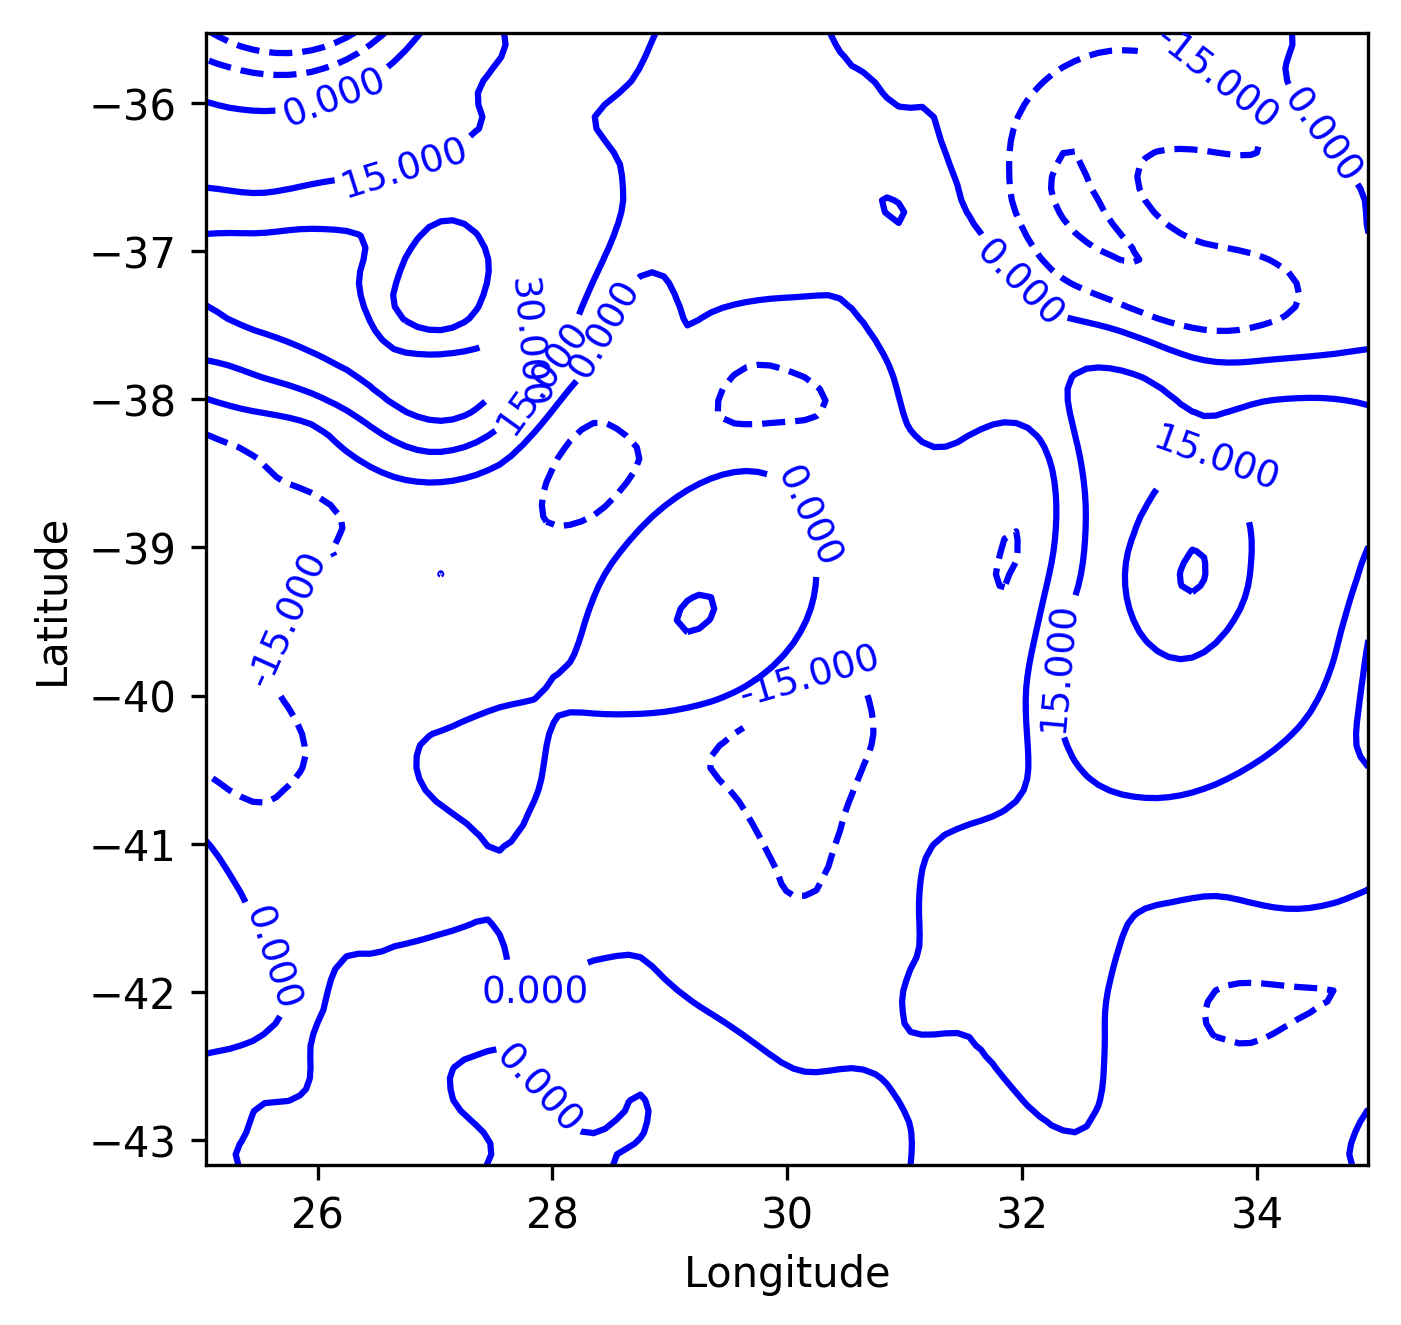

In [35]:
fig = plt.figure(figsize=(5,5),dpi=300)

CS=contour(Lon[areamap[1,0]:areamap[1,1],areamap[0,0]:areamap[0,1]],\
                       Lat[areamap[1,0]:areamap[1,1],areamap[0,0]:areamap[0,1]],\
                       eta[0,areamap[1,0]:areamap[1,1],areamap[0,0]:areamap[0,1]]\
                       -ssh_mean[areamap[1,0]:areamap[1,1],areamap[0,0]:areamap[0,1]]-\
                       (fieldSp[0,areamap[1,0]:areamap[1,1],areamap[0,0]:areamap[0,1]]\
                        +fieldSn[0,areamap[1,0]:areamap[1,1],areamap[0,0]:areamap[0,1]])\
                       ,vmin=-50,vmax=50,colors='b')
clabel(CS, fontsize=9, inline=1)

xlabel('Longitude')
ylabel('Latitude')

#ax.view_init(15, 100)
#fig.colorbar(ssurf, shrink=0.8, aspect=10)

In [36]:
eddytdn1=analyseddyzt(eta,lon,lat,0,1,1,-18,-18,-10,data_meant=ssh_mean,areamap=areamap,mask='',\
                     eccenfit=1,ellipsrsquarefit=-1,gaussrsquarefit=-1,\
                     destdir='',physics='',diagnostics=False,pprint=False)

 0% [>]100% Time Elapsed: 1 s  Number of contours analysed: 5 


In [37]:
ssha=eta-ssh_mean

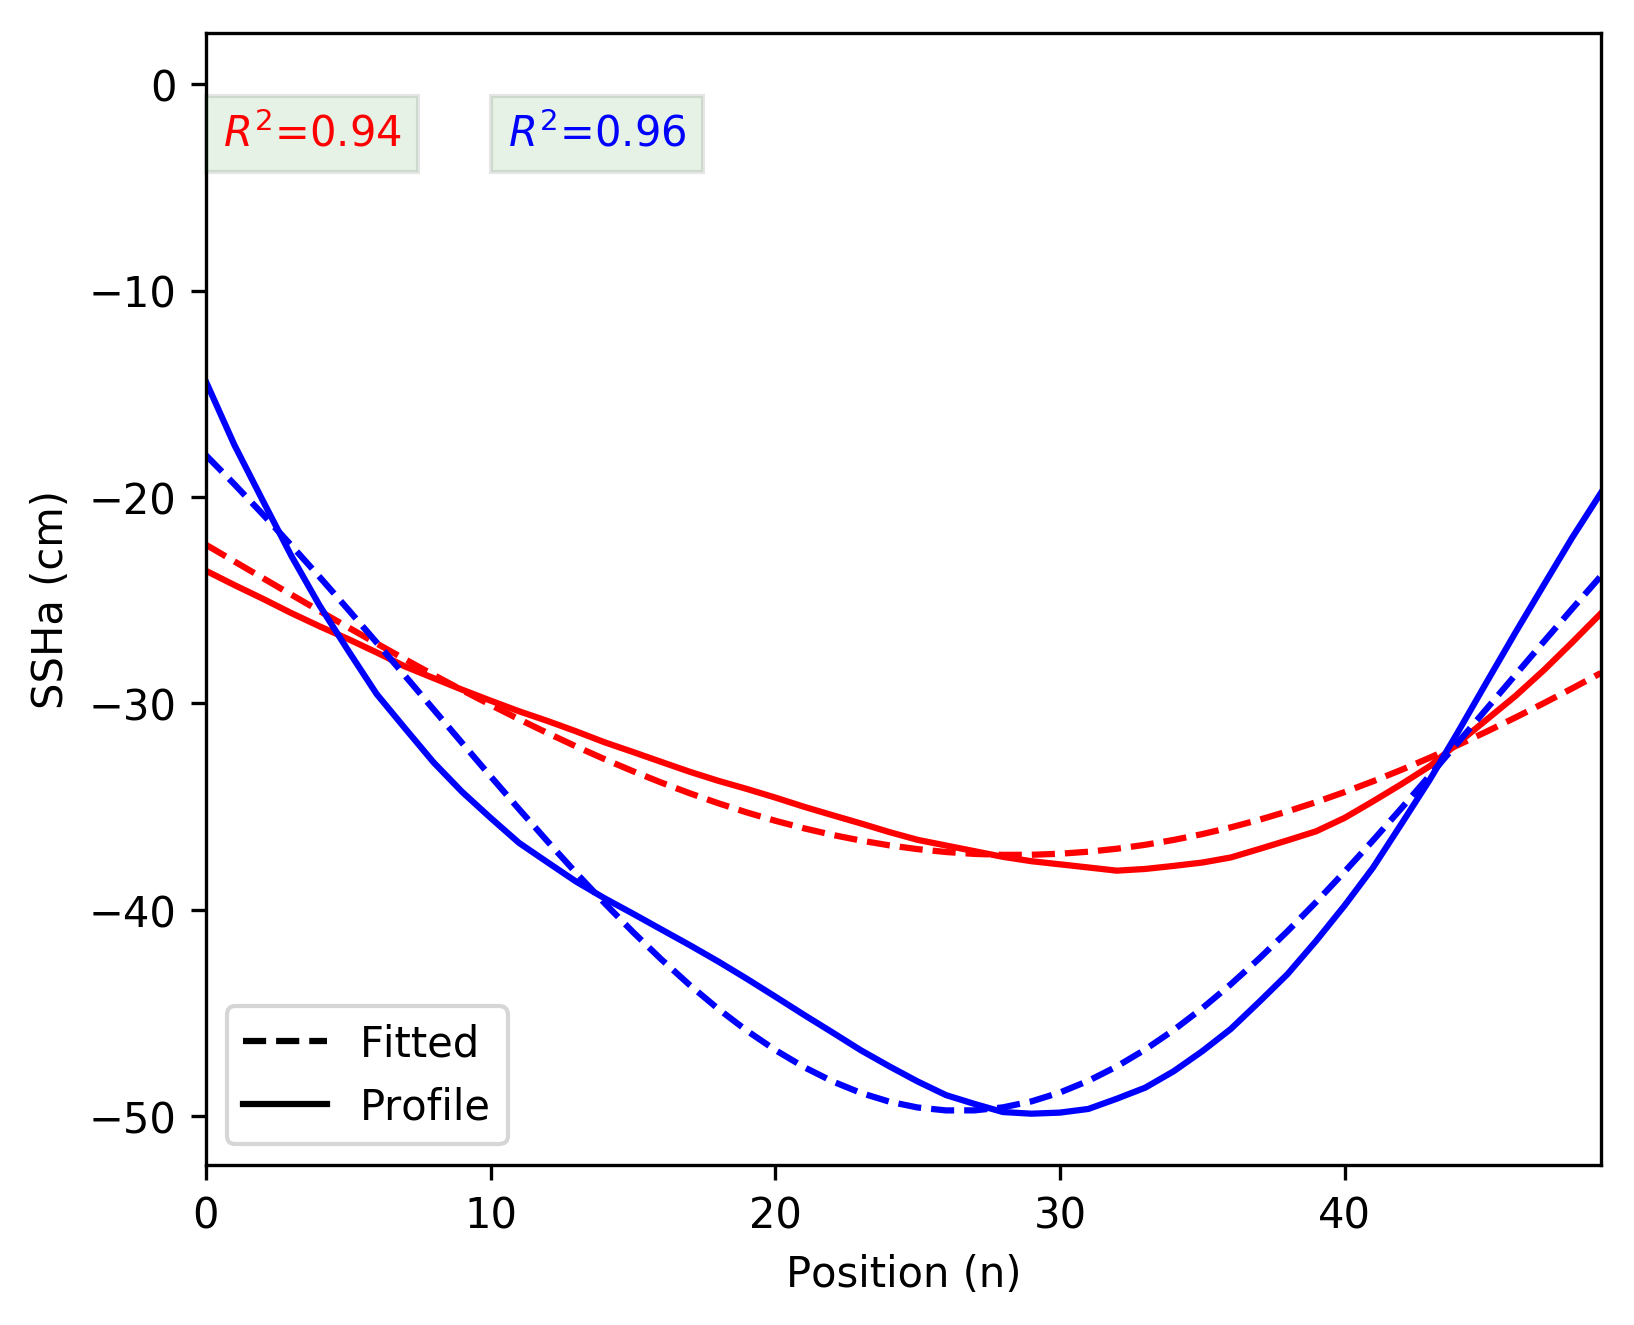

In [38]:
figure(figsize=(6,5),dpi=300)
threshold=7
color=['r','b','g','m','c']
xtext=[0.6,10.6,20.6,30.6,40.6]
#xtext=[5.6,15.6,25.6,35.6]
ytext=-3
iii=0

for ii in eddytdn1.keys(): 
    
    xidmin,xidmax=find2l(lon,lon,eddytdn1[ii]['contour'][0][0].min(),\
                         eddytdn1[ii]['contour'][0][0].max())
    yidmin,yidmax=find2l(lat,lat,eddytdn1[ii]['contour'][0][1].min(),\
                         eddytdn1[ii]['contour'][0][1].max())
    
    ssh_in_contour=ssha[0,yidmin-threshold+1:yidmax+threshold,xidmin-threshold+1:xidmax+threshold]
    lon_contour=lon[xidmin-threshold+1:xidmax+threshold]
    lat_contour=lat[yidmin-threshold+1:yidmax+threshold]
    
    
    profile,fit,checkm=extractprofeddy(eddytdn1[ii]['majoraxis'],\
                            ssh_in_contour,\
                            lon_contour,\
                            lat_contour,\
                            50,gaus='One',kind='linear',\
                            gaussrsquarefit=0.65,\
                            diagnostics=False,plotprofile=True)
    Rsquared = rsquard(profile,fit)
    plt.plot(range(0,50),profile,color[iii]+'-')
    plt.plot(range(0,50),fit,color[iii]+'--')
    if Rsquared < 0.61:
        plt.text(xtext[iii],ytext,r'$R^2$='+"%0.2f" %Rsquared,color=color[iii],\
             bbox=dict(facecolor='red', alpha=0.1))
    else:
        plt.text(xtext[iii],ytext,r'$R^2$='+"%0.2f" %Rsquared,color=color[iii],\
             bbox=dict(facecolor='green', alpha=0.1))
    

    iii=iii+1
    #plot(eddytdn1[ii]['contour'][0][0],eddytdn1[ii]['contour'][0][1])
    #show()
ylabel('SSHa (cm)')
xlabel('Position (n)')
plot(0,0,'--k',label='Fitted')
plot(0,0,'-k',label='Profile')
xlim(0,49)
legend(loc=3)

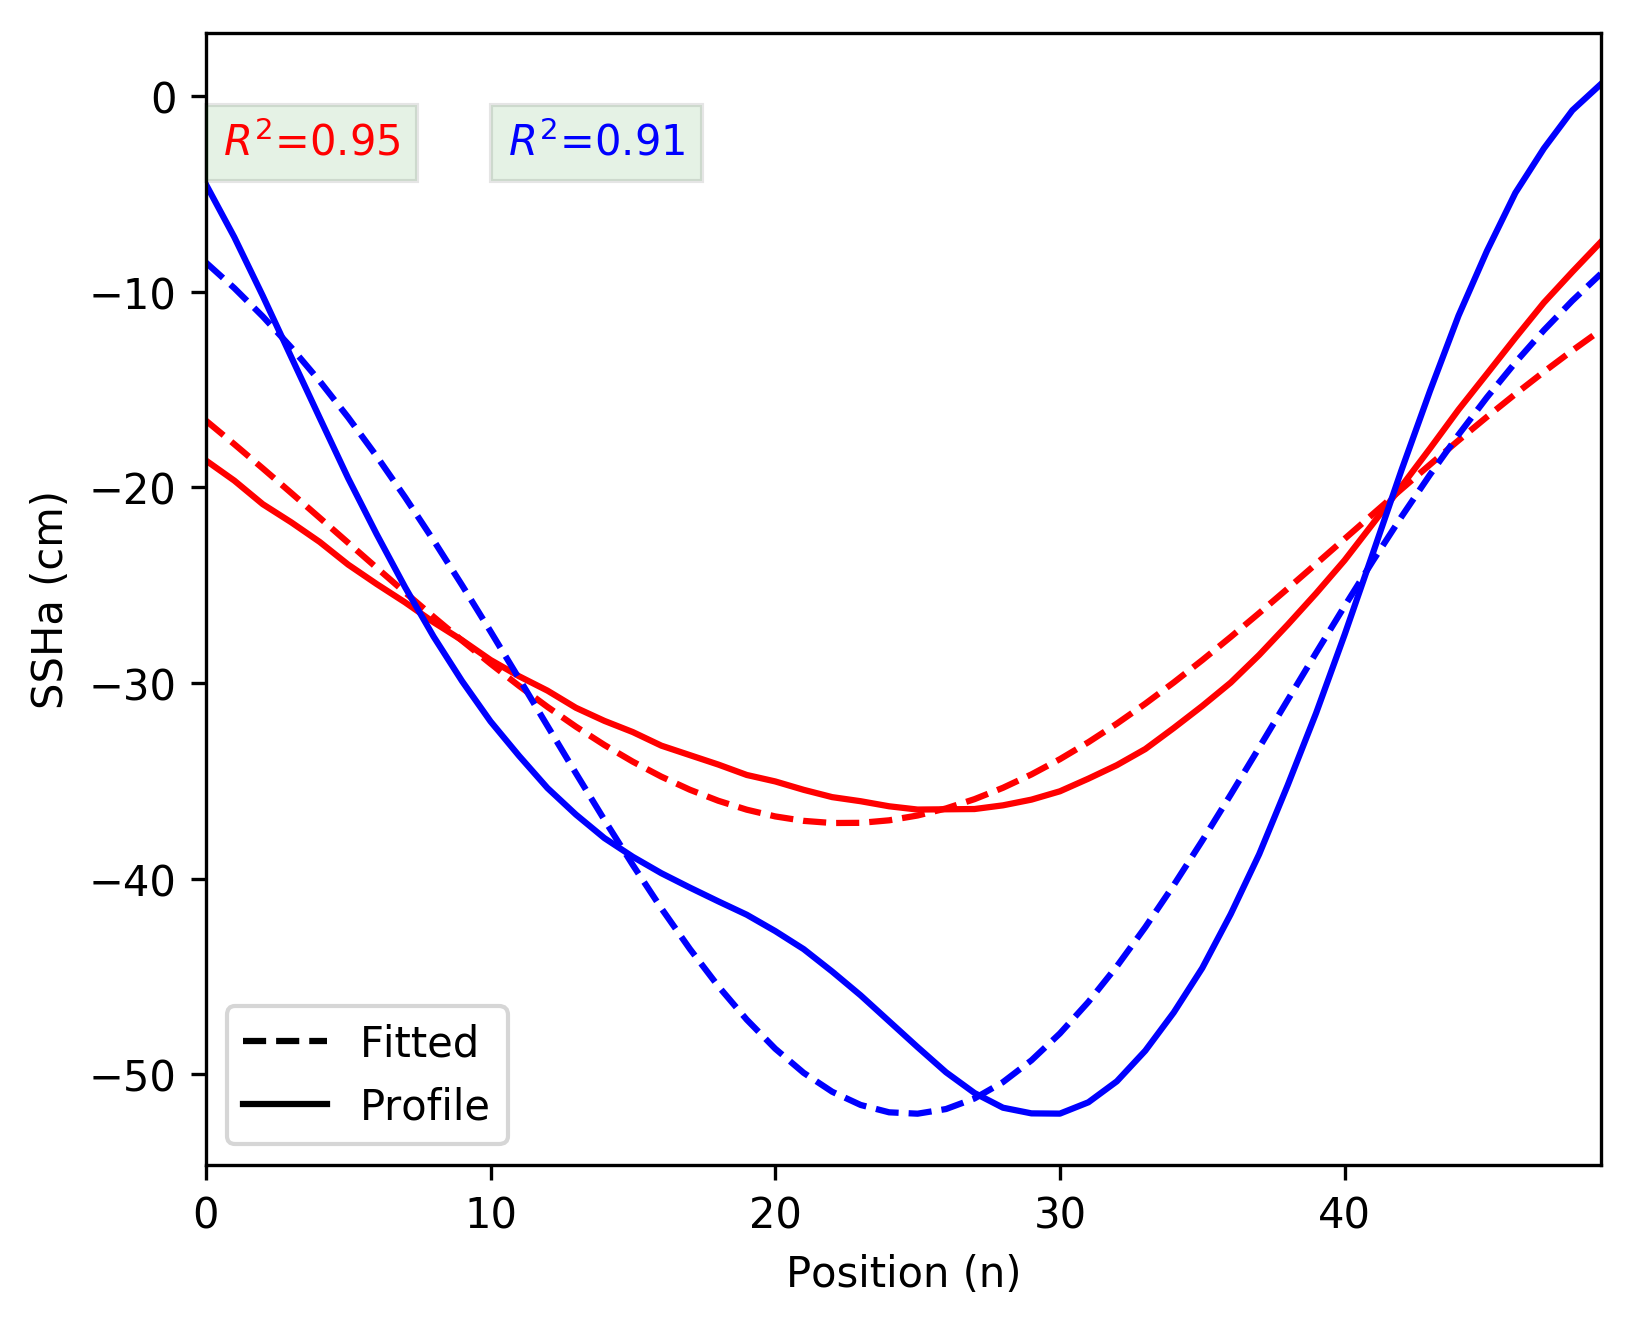

In [39]:
figure(figsize=(6,5),dpi=300)
threshold=7
color=['r','b','g','m','c']
xtext=[5.6,15.6,25.6,35.6]
xtext=[0.6,10.6,20.6,30.6,40.6]
ytext=-3
iii=0

for ii in eddytdn1.keys(): 
    
    xidmin,xidmax=find2l(lon,lon,eddytdn1[ii]['contour'][0][0].min(),\
                         eddytdn1[ii]['contour'][0][0].max())
    yidmin,yidmax=find2l(lat,lat,eddytdn1[ii]['contour'][0][1].min(),\
                         eddytdn1[ii]['contour'][0][1].max())
    
    ssh_in_contour=ssha[0,yidmin-threshold+1:yidmax+threshold,xidmin-threshold+1:xidmax+threshold]
    lon_contour=lon[xidmin-threshold+1:xidmax+threshold]
    lat_contour=lat[yidmin-threshold+1:yidmax+threshold]
    
    
    profile,fit,checkm=extractprofeddy(eddytdn1[ii]['minoraxis'],\
                            ssh_in_contour,\
                            lon_contour,\
                            lat_contour,\
                            50,gaus='One',kind='linear',\
                            gaussrsquarefit=0.65,\
                            diagnostics=False,plotprofile=True)
    Rsquared = rsquard(profile,fit)
    plt.plot(range(0,50),profile,color[iii]+'-')
    plt.plot(range(0,50),fit,color[iii]+'--')
    if Rsquared < 0.6:
        plt.text(xtext[iii],ytext,r'$R^2$='+"%0.2f" %Rsquared,color=color[iii],\
             bbox=dict(facecolor='red', alpha=0.1))
    else:
        plt.text(xtext[iii],ytext,r'$R^2$='+"%0.2f" %Rsquared,color=color[iii],\
             bbox=dict(facecolor='green', alpha=0.1))
    

    iii=iii+1
    #plot(eddytdn1[ii]['contour'][0][0],eddytdn1[ii]['contour'][0][1])
    #show()
ylabel('SSHa (cm)')
xlabel('Position (n)')
plot(0,0,'--k',label='Fitted')
plot(0,0,'-k',label='Profile')
xlim(0,49)
legend(loc=3)

In [40]:
eddytd3test=analyseddyzt(eta,lon,lat,0,1,1,40,10,1,data_meant=ssh_mean,areamap=areamap,mask=''\
                     ,destdir='',physics='',mode='parabolic',diagnostics=False,pprint=False)


NameError: name 'x0' is not defined

In [ ]:
eddytd3testn=analyseddyzt(eta,lon,lat,0,1,1,-40,-10,-1,data_meant=ssh_mean,areamap=areamap,mask=''\
                     ,destdir='',physics='',mode='parabolic',diagnostics=False,pprint=False)

In [ ]:

def reconstruct_syntetic(varshape,lon,lat,eddytd,mode='gaussian',usefullfit=False,diagnostics=False):
    '''
    *************** reconstruct_syntetic *******************
    Recunstruct the syntetic field using the gaussian 
    parameters saved in the dictionary of eddies.
    Notes:
        
    Args:
        
    Returns:
        
    Usage:
    
    '''
    Lon,Lat=np.meshgrid(lon,lat)
    fieldfit=np.zeros(varshape)
    for key in eddytd.keys():
        counter=0
        for tt in range(0,len(eddytd[key]['time'])):
            ttt=eddytd[key]['time'][tt]
            curvefit=eddytd[key]['2dgaussianfit'][counter]
            if isinstance(curvefit, np.float64):
                curvefit=eddytd[key]['2dgaussianfit']
            #Remove the slope and constant in the reconstruction of the eddy.
            if mode == 'parabolic':
                fittedcurve=twoD_Paraboloid((Lon,Lat), *curvefit[0:6])
                level=eddytd[key]['level']
                print(level)
                if level>0:
                    fittedcurve[fittedcurve<0]=0
                else:
                    fittedcurve[fittedcurve>0]=0
            elif mode == 'best':
                print('Work in progress')            
            elif mode == 'both':
                print('Work in progress')
            else:
                if usefullfit==False:
                    curvefit[-1]=0
                    curvefit[-2]=0
                    curvefit[-3]=0
                #print(gaussfit)
                fittedcurve=twoD_Gaussian((Lon,Lat), *curvefit)
            fieldfit[ttt,:,:]=fieldfit[ttt,:,:]+fittedcurve.reshape(len(lat),len(lon))
            counter=counter+1
        if diagnostics==True:
            print(key)
            plt.pcolormesh(Lon,Lat,fieldfit[0,:,:])
            plt.show()
    return fieldfit

In [ ]:
fieldS3test=reconstruct_syntetic(shape(eta),lon,lat,eddytd3test,mode='parabolic')

In [ ]:
fieldS3testn=reconstruct_syntetic(shape(eta),lon,lat,eddytd3testn,mode='parabolic')

In [ ]:
pcolormesh(fieldS3test[0,:,:])

In [ ]:
pcolormesh(fieldS3testn[0,:,:])

In [ ]:
print(eddytd3test['eddyn_0']['2dgaussianfit'][0])
fieldS3testp=twoD_Paraboloid((Lon,Lat), *eddytd3test['eddyn_0']['2dgaussianfit'][0][:6]).reshape(len(lat),len(lon))
fieldS3testp[fieldS3testp<0]=0

In [ ]:
%matplotlib inline
fig = plt.figure(figsize=(7,5),dpi=100)
ax = fig.gca(projection='3d')

Lon,Lat=meshgrid(lon, lat)
surf = ax.plot_surface(Lon[areamap[1,0]:areamap[1,1],areamap[0,0]:areamap[0,1]],\
                       Lat[areamap[1,0]:areamap[1,1],areamap[0,0]:areamap[0,1]],\
                       eta[0,areamap[1,0]:areamap[1,1],areamap[0,0]:areamap[0,1]]\
                       -ssh_mean[areamap[1,0]:areamap[1,1],areamap[0,0]:areamap[0,1]],\
                       cmap=cm.cm.balance,vmin=-50,vmax=50,\
                       alpha=0.5,shade='gouraud',antialiased=True)
fig.colorbar(surf, shrink=0.8, aspect=15)

ssurf = ax.plot_surface(Lon[areamap[1,0]:areamap[1,1],areamap[0,0]:areamap[0,1]],\
                        Lat[areamap[1,0]:areamap[1,1],areamap[0,0]:areamap[0,1]],\
                        fieldS3testp[areamap[1,0]:areamap[1,1],areamap[0,0]:areamap[0,1]],\
                        cmap=cm.cm.oxy,vmin=-50,vmax=50,\
                        alpha=0.5,shade='gouraud',antialiased=True)
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_zlabel('SSHa')
fig.colorbar(ssurf, shrink=0.8, aspect=15)
ax.view_init(0, 100)

In [ ]:
%matplotlib inline
fig = plt.figure(figsize=(7,5),dpi=100)
ax = fig.gca(projection='3d')

Lon,Lat=meshgrid(lon, lat)
surf = ax.plot_surface(Lon[areamap[1,0]:areamap[1,1],areamap[0,0]:areamap[0,1]],\
                       Lat[areamap[1,0]:areamap[1,1],areamap[0,0]:areamap[0,1]],\
                       eta[0,areamap[1,0]:areamap[1,1],areamap[0,0]:areamap[0,1]]\
                       -ssh_mean[areamap[1,0]:areamap[1,1],areamap[0,0]:areamap[0,1]],\
                       cmap=cm.cm.balance,vmin=-50,vmax=50,\
                       alpha=0.5,shade='gouraud',antialiased=True)
fig.colorbar(surf, shrink=0.8, aspect=15)

ssurf = ax.plot_surface(Lon[areamap[1,0]:areamap[1,1],areamap[0,0]:areamap[0,1]],\
                        Lat[areamap[1,0]:areamap[1,1],areamap[0,0]:areamap[0,1]],\
                        fieldS3test[0,areamap[1,0]:areamap[1,1],areamap[0,0]:areamap[0,1]],\
                        cmap=cm.cm.oxy,vmin=-50,vmax=50,\
                        alpha=0.5,shade='gouraud',antialiased=True)
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_zlabel('SSHa')
fig.colorbar(ssurf, shrink=0.8, aspect=15)
ax.view_init(0, 100)

In [ ]:
fig = plt.figure(figsize=(5,5),dpi=300)

CS=contour(Lon[areamap[1,0]:areamap[1,1],areamap[0,0]:areamap[0,1]],\
                       Lat[areamap[1,0]:areamap[1,1],areamap[0,0]:areamap[0,1]],\
                       eta[0,areamap[1,0]:areamap[1,1],areamap[0,0]:areamap[0,1]]\
                       -ssh_mean[areamap[1,0]:areamap[1,1],areamap[0,0]:areamap[0,1]],vmin=-50,vmax=50,colors='k')
clabel(CS, fontsize=9, inline=1)
#fig.colorbar(surf, shrink=0.8, aspect=10)

CS=contour(Lon[areamap[1,0]:areamap[1,1],areamap[0,0]:areamap[0,1]],\
                       Lat[areamap[1,0]:areamap[1,1],areamap[0,0]:areamap[0,1]],\
                       fieldS3test[0,areamap[1,0]:areamap[1,1],areamap[0,0]:areamap[0,1]]\
                       ,vmin=-50,vmax=50,colors='r')
clabel(CS, fontsize=9, inline=1)

xlabel('Longitude')
ylabel('Latitude')

#ax.view_init(15, 100)
#fig.colorbar(ssurf, shrink=0.8, aspect=10)

In [ ]:
u_eta,v_eta=geovelfield(eta[0,areamap[1,0]:areamap[1,1],areamap[0,0]:areamap[0,1]]/100,\
                        lon[areamap[0,0]:areamap[0,1]],\
                        lat[areamap[1,0]:areamap[1,1]],\
                        mask[areamap[1,0]:areamap[1,1],areamap[0,0]:areamap[0,1]])


In [ ]:
KEn=KE(u_eta,v_eta)

In [ ]:
f, (ax1, ax2) = plt.subplots(2, 1, sharey=True,figsize=(5,10),dpi=300)
ax1.pcolormesh(lon[areamap[0,0]:areamap[0,1]],\
           lat[areamap[1,0]:areamap[1,1]],\
           eta[0,areamap[1,0]:areamap[1,1],areamap[0,0]:areamap[0,1]]/100,vmin=-.60,vmax=.60,cmap=cm.cm.balance)
#ax.colorbar()
ax1.quiver(lon[areamap[0,0]:areamap[0,1]:3],\
       lat[areamap[1,0]:areamap[1,1]:3],\
       u_eta[::3,::3],v_eta[::3,::3])
ax2.pcolormesh(lon[areamap[0,0]:areamap[0,1]],\
           lat[areamap[1,0]:areamap[1,1]],\
           KEn,vmin=0,vmax=0.5,cmap=cm.cm.tempo)
#ax1.colorbar()

In [ ]:
u_eta,v_eta=geovelfield(eta[0,areamap[1,0]:areamap[1,1],areamap[0,0]:areamap[0,1]]/100-\
                        ssh_mean[areamap[1,0]:areamap[1,1],areamap[0,0]:areamap[0,1]]/100,\
                        lon[areamap[0,0]:areamap[0,1]],\
                        lat[areamap[1,0]:areamap[1,1]],\
                        mask[areamap[1,0]:areamap[1,1],areamap[0,0]:areamap[0,1]])


EKE=KE(u_eta,v_eta)

In [ ]:
f, (ax1, ax2) = plt.subplots(2, 1, sharey=True,figsize=(5,10),dpi=300)
ax1.pcolormesh(lon[areamap[0,0]:areamap[0,1]],\
           lat[areamap[1,0]:areamap[1,1]],\
           eta[0,areamap[1,0]:areamap[1,1],areamap[0,0]:areamap[0,1]]/100-\
           ssh_mean[areamap[1,0]:areamap[1,1],areamap[0,0]:areamap[0,1]]/100,\
           vmin=-.60,vmax=.60,cmap=cm.cm.balance)
#ax.colorbar()
ax1.quiver(lon[areamap[0,0]:areamap[0,1]:3],\
       lat[areamap[1,0]:areamap[1,1]:3],\
       u_eta[::3,::3],v_eta[::3,::3])
ax2.pcolormesh(lon[areamap[0,0]:areamap[0,1]],\
           lat[areamap[1,0]:areamap[1,1]],\
           EKE,vmin=0,vmax=0.5,cmap=cm.cm.tempo)
#ax1.colorbar()

In [ ]:
u_eddy,v_eddy=geovelfield(fieldSp[0,areamap[1,0]:areamap[1,1],areamap[0,0]:areamap[0,1]]/100+\
                       fieldSn[0,areamap[1,0]:areamap[1,1],areamap[0,0]:areamap[0,1]]/100,\
                        lon[areamap[0,0]:areamap[0,1]],\
                        lat[areamap[1,0]:areamap[1,1]],\
                        mask[areamap[1,0]:areamap[1,1],areamap[0,0]:areamap[0,1]])

In [ ]:
KE_eddy=KE(u_eddy,v_eddy)
print(KE_eddy.mean())

In [ ]:
f, (ax1, ax2) = plt.subplots(2, 1, sharey=True,figsize=(5,10),dpi=300)
cbar1=ax1.pcolormesh(lon[areamap[0,0]:areamap[0,1]],\
           lat[areamap[1,0]:areamap[1,1]],\
           fieldSp[0,areamap[1,0]:areamap[1,1],areamap[0,0]:areamap[0,1]]/100+\
           fieldSn[0,areamap[1,0]:areamap[1,1],areamap[0,0]:areamap[0,1]]/100,vmin=-.60,vmax=.60,cmap=cm.cm.balance)
#ax.colorbar()
ax1.quiver(lon[areamap[0,0]:areamap[0,1]:3],\
       lat[areamap[1,0]:areamap[1,1]:3],\
       u_eddy[::3,::3],v_eddy[::3,::3])
cbar2=ax2.pcolormesh(lon[areamap[0,0]:areamap[0,1]],\
           lat[areamap[1,0]:areamap[1,1]],\
           KE_eddy,vmin=0,vmax=0.5,cmap=cm.cm.tempo)
#fig.colorbar(cbar2,ax=ax2)

In [ ]:
f, (ax1, ax2) = plt.subplots(2, 1, sharey=True,figsize=(6,10),dpi=300)
ax1.pcolormesh(lon[areamap[0,0]:areamap[0,1]],\
           lat[areamap[1,0]:areamap[1,1]],\
           KEn-KE_eddy,\
           vmin=0,vmax=.5,cmap=cm.cm.tempo)
fig.colorbar(cbar1,ax=ax1)
cbar2=ax2.pcolormesh(lon[areamap[0,0]:areamap[0,1]],\
           lat[areamap[1,0]:areamap[1,1]],\
           EKE-KE_eddy,vmin=0,vmax=0.5,cmap=cm.cm.tempo)
fig.colorbar(cbar2,ax=ax2)

In [ ]:
print(r'KE_e',KE_eddy.mean())
print('KE',KEn.mean())
print('EKE',EKE.mean())
print(r'KE-KE_e',(KEn-KE_eddy).mean())
print(r"EKE-KE_e",(EKE-KE_eddy).mean())

In [ ]:
u_hat,v_hat=geovelfield(eta[0,areamap[1,0]:areamap[1,1],areamap[0,0]:areamap[0,1]]/100-\
                        (fieldSp[0,areamap[1,0]:areamap[1,1],areamap[0,0]:areamap[0,1]]\
                        +fieldSn[0,areamap[1,0]:areamap[1,1],areamap[0,0]:areamap[0,1]])/100,\
                        lon[areamap[0,0]:areamap[0,1]],\
                        lat[areamap[1,0]:areamap[1,1]],\
                        mask[areamap[1,0]:areamap[1,1],areamap[0,0]:areamap[0,1]])

In [ ]:
KE_hat=KE(u_hat,v_hat)
print(KE_hat.mean())

In [ ]:
f, (ax1, ax2) = plt.subplots(2, 1, sharey=True,figsize=(6,10),dpi=300)
cbar1=ax1.pcolormesh(lon[areamap[0,0]:areamap[0,1]],\
           lat[areamap[1,0]:areamap[1,1]],\
           eta[0,areamap[1,0]:areamap[1,1],areamap[0,0]:areamap[0,1]]/100-\
           (fieldSp[0,areamap[1,0]:areamap[1,1],areamap[0,0]:areamap[0,1]]\
           +fieldSn[0,areamap[1,0]:areamap[1,1],areamap[0,0]:areamap[0,1]])/100,vmin=-.6,vmax=.6,cmap=cm.cm.balance)
fig.colorbar(cbar1,ax=ax1)
Q=ax1.quiver(lon[areamap[0,0]:areamap[0,1]:3],\
       lat[areamap[1,0]:areamap[1,1]:3],\
       u_hat[::3,::3],v_hat[::3,::3])
ax1.quiverkey(Q, X=0.40, Y=1.015, U=0.5,
             label='0.5 m/s', labelpos='E')
cbar2=ax2.pcolormesh(lon[areamap[0,0]:areamap[0,1]],\
           lat[areamap[1,0]:areamap[1,1]],\
           KE_hat,vmin=0,vmax=0.5)
fig.colorbar(cbar2,ax=ax2)
#ax1.colorbar()

In [ ]:
#eddytd3test=analyseddyzt(eta,lon,lat,0,30,1,40,20,1,data_meant=ssh_mean,areamap=areamap,mask=''\
#                     ,destdir='',physics='',diagnostics=False,pprint=False)

In [ ]:
#eddytd3testn=analyseddyzt(eta,lon,lat,0,30,1,-40,-20,-1,data_meant=ssh_mean,areamap=areamap,mask=''\
#                     ,destdir='',physics='',diagnostics=False,pprint=False)

In [ ]:
#eddytd3test['eddyn_2'].keys()

In [ ]:
figure(figsize=(5,5),dpi=300)
contour(lon[areamap[0,0]:areamap[0,1]],\
        lat[areamap[1,0]:areamap[1,1]],\
        eta[0,areamap[1,0]:areamap[1,1],areamap[0,0]:areamap[0,1]]/100-\
        ssh_mean[areamap[1,0]:areamap[1,1],areamap[0,0]:areamap[0,1]]/100,\
        colors='red',alpha=0.3)
contour(lon[areamap[0,0]:areamap[0,1]],\
        lat[areamap[1,0]:areamap[1,1]],\
        eta[7,areamap[1,0]:areamap[1,1],areamap[0,0]:areamap[0,1]]/100-\
        ssh_mean[areamap[1,0]:areamap[1,1],areamap[0,0]:areamap[0,1]]/100,\
        colors='black',alpha=0.3)
eddy='eddyn_0'
plot(eddytd3[eddy]['contour'][0][0],eddytd3[eddy]['contour'][0][1],'-r',label='SSHa [t]')
plot(eddytd3[eddy]['position'][0][0],eddytd3[eddy]['position'][0][1],'or')
plot(eddytd3[eddy]['contour'][7][0],eddytd3[eddy]['contour'][7][1],'-k',label='SSHa [t+1]')
plot(eddytd3[eddy]['position'][7][0],eddytd3[eddy]['position'][7][1],'ok',alpha=0.5,label='Time-Tracking Intersection')
plot(eddytd3[eddy]['position'][7][0],eddytd3[eddy]['position'][7][1],'ok')

legend()

In [ ]:
#field_anim_P=reconstruct_syntetic(shape(eta),lon,lat,eddytd3test)
#field_anim_N=reconstruct_syntetic(shape(eta),lon,lat,eddytd3testn)

field=fieldSp[:,areamap[1,0]:areamap[1,1],areamap[0,0]:areamap[0,1]]+\
      fieldSn[:,areamap[1,0]:areamap[1,1],areamap[0,0]:areamap[0,1]] 
    
0,7,15,23,31,39,47,55

In [ ]:
for ii in range(0,60):
    f, (ax1, ax2) = plt.subplots(1, 2, sharey=True,figsize=(10,5.5),dpi=300)
    ax1.pcolormesh(lon[areamap[0,0]+80:areamap[0,1]],\
               lat[areamap[1,0]:areamap[1,1]],\
               eta[ii,areamap[1,0]:areamap[1,1],areamap[0,0]+80:areamap[0,1]]/100-\
               ssh_mean[areamap[1,0]:areamap[1,1],areamap[0,0]+80:areamap[0,1]]/100,cmap=cm.cm.balance,vmin=-0.50,vmax=0.50)
    ax1.set_title('SSHa Field',fontsize=20)
    ax1.tick_params(axis='both', labelsize=18)
    ax2.pcolormesh(lon[areamap[0,0]+80:areamap[0,1]],\
               lat[areamap[1,0]:areamap[1,1]],\
               field[ii,:,80::]/100,cmap=cm.cm.balance,vmin=-0.50,vmax=0.50)
    ax2.set_title('Reconstructed Field',fontsize=20)
    ax2.tick_params(axis='both', labelsize=18)
    plt.suptitle('Time = %2d Days' % ii,fontsize=22)
    show()

In [ ]:
vargeonc('/home/156/jm5970/github/trackeddy/output/syntetic_field.nc',lat[areamap[1,0]:areamap[1,1]],lon[areamap[0,0]:areamap[0,1]],\
         field[0:15,:,:]/100,15,'syntetic_field',nc_description='Syntetic Field Data',units='m',dt='',dim='2D',format='NETCDF3_CLASSIC')

In [ ]:
vargeonc('/home/156/jm5970/github/trackeddy/output/syntetic_field_p.nc',lat[areamap[1,0]:areamap[1,1]],lon[areamap[0,0]:areamap[0,1]],\
         fieldSp[0:15,areamap[1,0]:areamap[1,1],areamap[0,0]:areamap[0,1]]/100,15,'syntetic_pos',nc_description='Syntetic Field Data',units='m',dt='',dim='2D',format='NETCDF3_CLASSIC')
vargeonc('/home/156/jm5970/github/trackeddy/output/syntetic_field_n.nc',lat[areamap[1,0]:areamap[1,1]],lon[areamap[0,0]:areamap[0,1]],\
         fieldSn[0:15,areamap[1,0]:areamap[1,1],areamap[0,0]:areamap[0,1]]/100,15,'syntetic_neg',nc_description='Syntetic Field Data',units='m',dt='',dim='2D',format='NETCDF3_CLASSIC')

In [ ]:
vargeonc('/home/156/jm5970/github/trackeddy/output/ssha_field.nc',lat[areamap[1,0]:areamap[1,1]],lon[areamap[0,0]:areamap[0,1]],\
         eta[0:15,areamap[1,0]:areamap[1,1],areamap[0,0]:areamap[0,1]]/100-\
         ssh_mean[areamap[1,0]:areamap[1,1],areamap[0,0]:areamap[0,1]]/100,\
         15,'ssha',nc_description='SSHa Field Data',units='m',dt='',dim='2D',format='NETCDF3_CLASSIC')


In [ ]:
vargeonc('/home/156/jm5970/github/trackeddy/output/difference.nc',lat[areamap[1,0]:areamap[1,1]],lon[areamap[0,0]:areamap[0,1]],\
         eta[0:15,areamap[1,0]:areamap[1,1],areamap[0,0]:areamap[0,1]]/100-\
         ssh_mean[areamap[1,0]:areamap[1,1],areamap[0,0]:areamap[0,1]]/100-field[0:15,:,:]/100,\
         15,'diff',nc_description='SSHa - Syntetic Field Data',units='m',dt='',dim='2D',format='NETCDF3_CLASSIC')



In [ ]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True,figsize=(10,5),dpi=300)
ax1.pcolormesh(lon[areamap[0,0]:areamap[0,1]],\
               lat[areamap[1,0]:areamap[1,1]],\
               field[0,:,:])
ax2.pcolormesh(lon[areamap[0,0]:areamap[0,1]],\
               lat[areamap[1,0]:areamap[1,1]],\
               eta[0,areamap[1,0]:areamap[1,1],areamap[0,0]:areamap[0,1]]/100-\
               ssh_mean[areamap[1,0]:areamap[1,1],areamap[0,0]:areamap[0,1]]/100)
title('T = %d' %ii )
show()

In [ ]:
pos=[0.907033126853,0.905227377193,0.905227377175,0.896713495381,0.895396119365,0.895396119355,0.887947727673,0.879303841427,\
    0.877538989216,0.877538989143,0.996401314707,0.875376438784,0.865807326165,0.99426403602,0.865807326108,0.992023244025,\
    0.859905310447,0.989980644565,0.98675760525,0.984807638574,0.981637480104,0.980019241931,0.980019241932,0.978894597114,\
    0.977386804328,0.972922025433,0.972922025437,0.82536581074,0.970862780922,0.965263172995,0.931643746824,0.965263172993,\
    0.885367415283,\
    0.941499929064,0.938317301291,0.95985520007,0.919666316164,0.955782427138,0.915078886188,0.937961977254,0.930120293033,\
    0.934582575989,0.923709221989,0.934582576063,0.92370922199,0.916025591068,0.899207613561,0.915028977272,0.899207613603,\
    0.908203455515,0.95346591152,0.894998924178,0.897736249125,0.952249663496,0.906437296344,0.896585258974,0.952249663511,\
    0.902427461656,0.88817539644,0.95224966351,0.877104963321,0.889625874702,0.945381573588,0.849793864555,0.889625874384,\
    0.945822894719,0.821544709487,0.881775384363,0.817628508883,0.88123311218,0.793220310797,0.88123311184,0.760273730862,\
    0.86537364232,0.75376806036,0.872222879121,0.728150996819,0.85587165359,0.724655822299,0.84641592454,0.699307761874,\
    0.845879696228,0.671558411347,0.835792715455]
print(mean(pos),len(pos))

In [ ]:
eddytdp=analyseddyzt(eta,lon,lat,0,1,1,40,5,5,data_meant=ssh_mean,areamap=array([[0,len(lon)],[0,len(lat)]]),\
                     mask='',\
                     destdir='',physics='',diagnostics=False,pprint=False)

In [ ]:
eddytdn=analyseddyzt(eta,lon,lat,0,1,1,-40,-5,-5,data_meant=ssh_mean,areamap=array([[0,len(lon)],[0,len(lat)]]),\
                     mask='',\
                     destdir='',physics='',diagnostics=False,pprint=False)

In [ ]:
southernn=reconstruct_syntetic(shape(eta),lon,lat,eddytdn)
southernp=reconstruct_syntetic(shape(eta),lon,lat,eddytdp)
southern=southernn+southernp

In [ ]:
pcolormesh(southern[0,:,:])

In [ ]:
pcolormesh(eta[0,600:,2500:]-ssh_mean[600:,2500:])

In [ ]:

from mpl_toolkits.basemap import Basemap

fig, ax = plt.subplots(2, 1, figsize=(12,10),dpi=300)


latcorners = lat[:]
loncorners = lon[:]
lon_0=lon[2700]
lat_0=lat[600]

llon,latt=meshgrid(lon[2700:],lat[600:])

m = Basemap(projection='merc',lon_0=lon_0,lat_0=90.,lat_ts=lat_0,\
            rsphere=(6378137.00,6356752.3142),\
            llcrnrlat=latcorners[0],urcrnrlat=latcorners[-1],\
            llcrnrlon=loncorners[0],urcrnrlon=loncorners[-1],\
            resolution='l',area_thresh=10000,ax=ax[0])

m.drawcoastlines()
m.fillcontinents()
m.drawparallels(np.arange(-10,-90,-10),labels=[1,1,0,1],fontsize=22)
# draw meridians
m.drawmeridians(np.arange(-180,180,30),labels=[1,1,0,1],fontsize=22)
Lon,Lat=m(llon,latt)
ax[0].pcolormesh(Lon,Lat,eta[0,600:,2700:]-ssh_mean[600:,2700:],cmap=cm.cm.balance)
tt=ax[0].set_title('SSHa', fontsize=30)
tt.set_position([.5, 1.001])
m = Basemap(projection='merc',lon_0=lon_0,lat_0=90.,lat_ts=lat_0,\
            rsphere=(6378137.00,6356752.3142),\
            llcrnrlat=latcorners[0],urcrnrlat=latcorners[-1],\
            llcrnrlon=loncorners[0],urcrnrlon=loncorners[-1],\
            resolution='l',area_thresh=10000,ax=ax[1])

m.drawcoastlines()
m.fillcontinents()
m.drawparallels(np.arange(-10,-90,-10),labels=[1,1,0,1],fontsize=22)
# draw meridians
m.drawmeridians(np.arange(-180,180,30),labels=[1,1,0,1],fontsize=22)
Lon,Lat=m(llon,latt)
ax[1].pcolormesh(Lon,Lat,southern[0,600:,2700:],cmap=cm.cm.balance)
ttl=ax[1].set_title('Reconstructed Field', fontsize=30)
ttl.set_position([.5, 1.001])
 
#basemap_mplot(lon[2700:],lat[600:],[eta[0,600:,2700:]-ssh_mean[600:,2700:],southern[0,600:,2700:]],\
#              ['SSHa','Reconstructed_field'],projection='merc',lat_0=-90,lon_0=-100,boundinglat=-30,\
#              resolution='c',scale='Lin',vmin=-50,vmax=50,cmap=cm.cm.balance,xan=1,yan=2,figsize=(10,10),fontsize=15)

In [ ]:
def geovelfield(ssha,lon,lat,mask,value):
    ma.filled(ssha,np.nan)
    distmlon=sw.dist(0,lon,'km')[0][:]*1000
    distmlat=sw.dist(0,lat,'km')[0][:]*1000
    mlon=np.cumsum(distmlon)
    mlat=np.cumsum(distmlat)
    dy=np.gradient(mlat)
    dx=np.gradient(mlon)
    detay,detax=np.gradient(ssha)
    omega = 7.2921e-5
    g=9.81
    f=2*omega*np.sin(np.deg2rad(lat))
    u=np.zeros(np.shape(ssha))
    v=np.zeros(np.shape(ssha))
    for ii in range(np.shape(ssha)[1]-1):
        detaxdy=detax[:,ii]/dx[ii]
        v[:,ii]=(g/f)*(detaxdy)
    for jj in range(np.shape(ssha)[0]-1):
        detaydx=detay[jj,:]/dy[jj]
        u[jj,:]=-(g/f[jj])*(detaydx)
    u[u>value]=nan
    v[v>value]=nan
    u[u<-value]=nan
    v[v<-value]=nan
    u= np.ma.masked_array(u, mask)
    v= np.ma.masked_array(v, mask)
    return u,v

In [ ]:
u_eta,v_eta=geovelfield(eta[0,:,:]/100,loncorners,latcorners,mask[:,:],5)
KEn=KE(u_eta,v_eta)

In [ ]:
u_eta,v_eta=geovelfield(eta[0,:,:]/100-ssh_mean[:,:]/100,loncorners,latcorners,mask[:,:],5)
EKE=KE(u_eta,v_eta)

In [ ]:
u_eddy,v_eddy=geovelfield(southern[0,:,:]/100,loncorners,latcorners,mask[:,:],5)
KE_eddy=KE(u_eddy,v_eddy)

In [ ]:
f, ax = plt.subplots(2, 4, sharey=True, sharex=True,figsize=(21,6),dpi=300)
print(ax)
cbar1=ax[0,0].pcolormesh(loncorners,latcorners,\
           eta[0,:,:]/100,\
           vmin=-0.5,vmax=.5,cmap=cm.cm.balance)
ax[1,0].pcolormesh(loncorners,latcorners,\
           KEn,vmin=0,vmax=0.5,cmap=cm.cm.tempo)
ax[0,1].pcolormesh(loncorners,latcorners,\
           eta[0,:,:]/100-ssh_mean[:,:]/100,\
           vmin=-0.5,vmax=.5,cmap=cm.cm.balance)
ax[1,1].pcolormesh(loncorners,latcorners,\
           EKE,vmin=0,vmax=0.5,cmap=cm.cm.tempo)
ax[0,2].pcolormesh(loncorners,latcorners,\
           southern[0,:,:]/100,\
           vmin=-0.5,vmax=.5,cmap=cm.cm.balance)
cbar2=ax[1,2].pcolormesh(loncorners,latcorners,\
           KE_eddy,vmin=0,vmax=0.5,cmap=cm.cm.tempo)
ax[0,3].pcolormesh(loncorners,latcorners,\
           KEn-KE_eddy,\
           vmin=0,vmax=.5,cmap=cm.cm.tempo)
fig.colorbar(cbar1,ax=ax[0,3])
cbar2=ax[1,3].pcolormesh(loncorners,latcorners,\
           EKE-KE_eddy,vmin=0,vmax=0.5,cmap=cm.cm.tempo)
fig.colorbar(cbar2,ax=ax[1,3])

In [ ]:
print(r'KE_e',KE_eddy.mean())
print('KE',KEn.mean())
print('EKE',EKE.mean())
print(r'KE-KE_e',(KEn-KE_eddy).mean())
print(r"EKE-KE_e",(EKE-KE_eddy).mean())

In [ ]:
vargeonc('/home/156/jm5970/github/trackeddy/output/syntetic_field.nc',loncorners,latcorners,\
         southern[0,600:,2700:]/100,1,'syntetic_field',nc_description='Syntetic Field Data',units='m',dt='',dim='2D',format='NETCDF3_CLASSIC')
vargeonc('/home/156/jm5970/github/trackeddy/output/syntetic_field_p.nc',loncorners,latcorners,\
         southernp[0,600:,2700:]/100,1,'syntetic_pos',nc_description='Syntetic Field Data',units='m',dt='',dim='2D',format='NETCDF3_CLASSIC')
vargeonc('/home/156/jm5970/github/trackeddy/output/syntetic_field_n.nc',loncorners,latcorners,\
         southernn[0,600:,2700:]/100,1,'syntetic_neg',nc_description='Syntetic Field Data',units='m',dt='',dim='2D',format='NETCDF3_CLASSIC')

vargeonc('/home/156/jm5970/github/trackeddy/output/ssha_field.nc',loncorners,latcorners,\
           eta[0,600:,2700:]/100-ssh_mean[600:,2700:]/100,\
         1,'ssha',nc_description='SSHa Field Data',units='m',dt='',dim='2D',format='NETCDF3_CLASSIC')
